Background research and exploratory data analysisx

## PART A: CONVOLUTIONAL NEURAL NETWORK

In [1]:
#Exploratory Data Analysis

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
# import numpy as np

# bean_image = Image.open(r"C:\Users\p2317454\Documents\DENG LABS (USE THIS)\CA1 Stuff\Dataset for CA1 part A - AY2425S1\Dataset for CA1 part A - AY2425S1\test\Bean\0001.jpg")

# # Convert the image to a NumPy array
# bean_array = np.array(bean_image)

# # Display the shape of the array
# print(bean_array.shape)

In [79]:
#Test(Folder) Number of images in each vegetable folder
import os
import glob

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

# Base directory containing the 15 directories
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test'

# List of 14 other directories
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Loop through each directory, count JPG files, and print the result
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print("Number of .jpg files in", directory, ":", num_jpg_files)

Number of .jpg files in Bean : 200
Number of .jpg files in Bitter_Gourd : 200
Number of .jpg files in Bottle_Gourd : 200
Number of .jpg files in Brinjal : 200
Number of .jpg files in Broccoli : 200
Number of .jpg files in Cabbage : 200
Number of .jpg files in Capsicum : 200
Number of .jpg files in Carrot : 200
Number of .jpg files in Cauliflower : 200
Number of .jpg files in Cucumber : 200
Number of .jpg files in Papaya : 200
Number of .jpg files in Potato : 200
Number of .jpg files in Pumpkin : 200
Number of .jpg files in Radish : 200
Number of .jpg files in Tomato : 200


## Test(Folder) - All vegetable folder contains 200 .jpg vegetable images respectively, all images are consistent with the name of the vegetable

In [80]:
#Train(Folder) Number of images in each vegetable folder
import os
import glob

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

# Base directory containing the 15 directories
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train'

# List of 14 other directories
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Loop through each directory, count JPG files, and print the result
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print("Number of .jpg files in", directory, ":", num_jpg_files)

Number of .jpg files in Bean : 780
Number of .jpg files in Bitter_Gourd : 720
Number of .jpg files in Bottle_Gourd : 441
Number of .jpg files in Brinjal : 868
Number of .jpg files in Broccoli : 750
Number of .jpg files in Cabbage : 503
Number of .jpg files in Capsicum : 351
Number of .jpg files in Carrot : 256
Number of .jpg files in Cauliflower : 587
Number of .jpg files in Cucumber : 812
Number of .jpg files in Papaya : 566
Number of .jpg files in Potato : 377
Number of .jpg files in Pumpkin : 814
Number of .jpg files in Radish : 248
Number of .jpg files in Tomato : 955


## Unbalanced number of vegetable images, some of the folders more than the others, moreover,
-"Bean" folder contained some carrot images and copies which are unwanted. and needs to be removed
- Upon visual inspection, some of the "Brinjal" and "Papaya" Images are very similar, and are very hard to tell apart.
- "Tomato" folder contained images which are very stretched, causing it to lost its original aspect ratio, this wil be a problem for the model to recognize the image after training the model.

# Visualising the spread of vegetable data in the "Train" folder

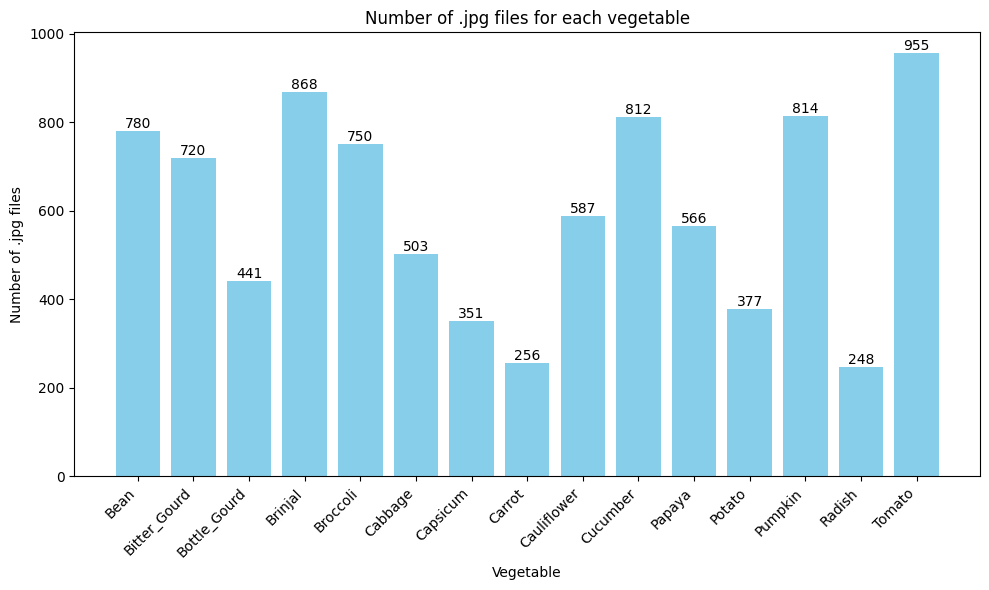

In [3]:
import os
import glob
import matplotlib.pyplot as plt

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

# Base directory containing the 15 directories
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train'

# List of 14 other directories
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Initialize lists to store vegetable names and their corresponding counts
vegetable_names = []
num_files = []

# Loop through each directory, count JPG files, and store the results
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    vegetable_names.append(directory)
    num_files.append(num_jpg_files)

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(vegetable_names, num_files, color='skyblue')
plt.xlabel('Vegetable')
plt.ylabel('Number of .jpg files')
plt.title('Number of .jpg files for each vegetable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding text labels
for bar, count in zip(bars, num_files):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()


# From here, i can see that the Max(Tomato) which has 955 images and Min(Radish) which has 248 images
- There is a very unbalanced spread of data across the vegetables.
- The number of images for each vegetable will definitely affect the training and testing of the model, given the unbalanced spread of data.

## Cleaning some of the data

In [4]:
#Removing Carrot Images in "Bean" folder and removing bean images(copy)
import os

def remove_images(folder_path, image_filenames):
    for filename in image_filenames:
        file_path = os.path.join(folder_path, filename)
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"Removed: {filename}")
        else:
            print(f"File not found: {filename}")

# Example usage:
folder_path = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train\Bean'
image_filenames_to_remove = ["0001.jpg", "0002.jpg", "0003.jpg", "0004.jpg", "0017.jpg", "0018.jpg", "0019.jpg", "0020.jpg", "0033.jpg", "0049.jpg", "0050.jpg", "0026 - Copy.jpg", "0028 - Copy.jpg", "0029 - Copy.jpg", "0030 - Copy.jpg"]
remove_images(folder_path, image_filenames_to_remove)

Removed: 0001.jpg
Removed: 0002.jpg
Removed: 0003.jpg
Removed: 0004.jpg
Removed: 0017.jpg
Removed: 0018.jpg
Removed: 0019.jpg
Removed: 0020.jpg
Removed: 0033.jpg
Removed: 0049.jpg
Removed: 0050.jpg
Removed: 0026 - Copy.jpg
Removed: 0028 - Copy.jpg
Removed: 0029 - Copy.jpg
Removed: 0030 - Copy.jpg


In [14]:
#Validation(Folder) Number of images in each vegetable folder
import os
import glob

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

# Base directory containing the 15 directories
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation'

# List of 14 other directories
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Loop through each directory, count JPG files, and print the result
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print("Number of .jpg files in", directory, ":", num_jpg_files)

Number of .jpg files in Bean : 200
Number of .jpg files in Bitter_Gourd : 200
Number of .jpg files in Bottle_Gourd : 200
Number of .jpg files in Brinjal : 200
Number of .jpg files in Broccoli : 200
Number of .jpg files in Cabbage : 200
Number of .jpg files in Capsicum : 200
Number of .jpg files in Carrot : 200
Number of .jpg files in Cauliflower : 200
Number of .jpg files in Cucumber : 200
Number of .jpg files in Papaya : 200
Number of .jpg files in Potato : 200
Number of .jpg files in Pumpkin : 200
Number of .jpg files in Radish : 200
Number of .jpg files in Tomato : 200


#### Validation(Folder)- CONSISTENT AMOUNT(200) OF IMAGES, Upon visual inspection all the images are correctly organised in their respective folders.

# Visualising some of the images

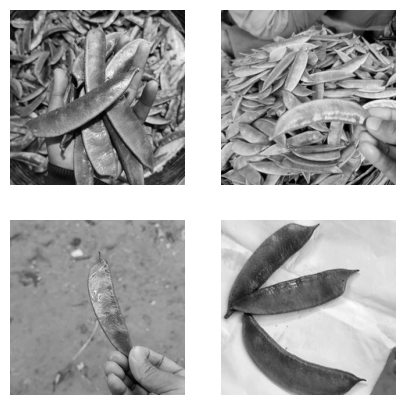

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory containing your images
directory = r"C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test\Bean"

# Get the list of image files in the directory
image_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.jpg')]

# Plot the first 4 images as grayscale
plt.figure(figsize=(5, 5))
# image = Image.open(image_files[1]).convert("L")
# plt.imshow(image, cmap='gray')
# plt.axis('off')

for i in range(min(4, len(image_files))):
    image = Image.open(image_files[i]).convert("L")  # Convert to grayscale
    plt.subplot(2, 2, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

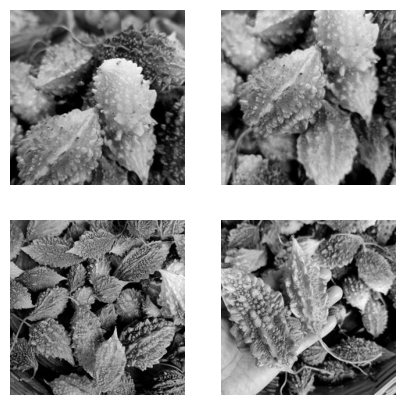

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory containing your images
directory = r"C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test\Bitter_Gourd"

# Get the list of image files in the directory
image_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.jpg')]

# Plot the first 4 images as grayscale
plt.figure(figsize=(5, 5))
# image = Image.open(image_files[1]).convert("L")
# plt.imshow(image, cmap='gray')
# plt.axis('off')

for i in range(min(4, len(image_files))):
    image = Image.open(image_files[i]).convert("L")  # Convert to grayscale
    plt.subplot(2, 2, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

## Looking at some samples of Beans and Brinjal,
#### I observe that some of the images contained a person's hand while some do not, this may cause inaccuracies while training the model and evaluating the image.

#### Also, some of the images contained multiple of the vegetable(brinjal) while some of the image contained only 1 of that vegetable(bean),

Both of these reasons may cause a Data Imbalance,
The imbalance between single-vegetable and multi-vegetable images can skew the class distribution in your dataset. If there are significantly more single-vegetable images than multi-vegetable ones (or vice versa), the model may be biased towards the dominant class, potentially leading to suboptimal performance.

In [82]:
# Loading 37x37 grayscale images (Test data)
import os
import glob
from PIL import Image

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

def convert_and_resize_image(image_path, output_path):
    # Open the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to grayscale
    img_gray = img.convert('L')
    
    # Resize the image to 37x37
    img_resized = img_gray.resize((37, 37))
    
    # Save the resized image
    img_resized.save(output_path)

# Base directory containing the "test" directory
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test'

# Output directory for resized and grayscale images
output_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'
os.makedirs(output_directory, exist_ok=True)

# List of 15 directories in the "test" directory
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Loop through each directory, process images, and save them in the output directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print("Processing", num_jpg_files, ".jpg files in", directory)
    
    # Create a subdirectory for each vegetable in the output directory
    output_vegetable_directory = os.path.join(output_directory, directory)
    os.makedirs(output_vegetable_directory, exist_ok=True)
    
    # Loop through each jpg file in the directory
    for jpg_file in glob.glob(os.path.join(directory_path, '*.jpg')):
        # Get the filename without extension
        filename = os.path.splitext(os.path.basename(jpg_file))[0]
        
        # Define output path for the resized and grayscale image
        output_path = os.path.join(output_vegetable_directory, filename + '_resized_gray.jpg')
        
        # Convert and resize the image
        convert_and_resize_image(jpg_file, output_path)

print("All images processed and saved in 'test_37' directory.")



Processing 200 .jpg files in Bean
Processing 200 .jpg files in Bitter_Gourd
Processing 200 .jpg files in Bottle_Gourd
Processing 200 .jpg files in Brinjal
Processing 200 .jpg files in Broccoli
Processing 200 .jpg files in Cabbage
Processing 200 .jpg files in Capsicum
Processing 200 .jpg files in Carrot
Processing 200 .jpg files in Cauliflower
Processing 200 .jpg files in Cucumber
Processing 200 .jpg files in Papaya
Processing 200 .jpg files in Potato
Processing 200 .jpg files in Pumpkin
Processing 200 .jpg files in Radish
Processing 200 .jpg files in Tomato
All images processed and saved in 'test_37' directory.


In [83]:
import os
import glob
from PIL import Image

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

def convert_and_resize_image(image_path, output_path):
    # Open the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to grayscale
    img_gray = img.convert('L')
    
    # Resize the image to 37x37
    img_resized = img_gray.resize((37, 37))
    
    # Save the resized image
    img_resized.save(output_path)

# Base directory containing the "train" directory
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train'

# Output directory for resized and grayscale images
output_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_37'
os.makedirs(output_directory, exist_ok=True)

# List of 15 directories in the "train" directory
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Loop through each directory, process images, and save them in the output directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print("Processing", num_jpg_files, ".jpg files in", directory)
    
    # Create a subdirectory for each vegetable in the output directory
    output_vegetable_directory = os.path.join(output_directory, directory)
    os.makedirs(output_vegetable_directory, exist_ok=True)
    
    # Loop through each jpg file in the directory
    for jpg_file in glob.glob(os.path.join(directory_path, '*.jpg')):
        # Get the filename without extension
        filename = os.path.splitext(os.path.basename(jpg_file))[0]
        
        # Define output path for the resized and grayscale image
        output_path = os.path.join(output_vegetable_directory, filename + '_resized_gray.jpg')
        
        # Convert and resize the image
        convert_and_resize_image(jpg_file, output_path)

print("All images processed and saved in 'train_37' directory.")



Processing 780 .jpg files in Bean
Processing 720 .jpg files in Bitter_Gourd
Processing 441 .jpg files in Bottle_Gourd
Processing 868 .jpg files in Brinjal
Processing 750 .jpg files in Broccoli
Processing 503 .jpg files in Cabbage
Processing 351 .jpg files in Capsicum
Processing 256 .jpg files in Carrot
Processing 587 .jpg files in Cauliflower
Processing 812 .jpg files in Cucumber
Processing 566 .jpg files in Papaya
Processing 377 .jpg files in Potato
Processing 814 .jpg files in Pumpkin
Processing 248 .jpg files in Radish
Processing 955 .jpg files in Tomato
All images processed and saved in 'train_37' directory.


In [84]:
# Loading 37x37 grayscale images (Validation data)
import os
import glob
from PIL import Image

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

def convert_and_resize_image(image_path, output_path):
    # Open the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to grayscale
    img_gray = img.convert('L')
    
    # Resize the image to 37x37
    img_resized = img_gray.resize((37, 37))
    
    # Save the resized image
    img_resized.save(output_path)

# Base directory containing the "validation" directory
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation'

# Output directory for resized and grayscale images
output_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
os.makedirs(output_directory, exist_ok=True)

# List of 15 directories in the "validation" directory
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Loop through each directory, process images, and save them in the output directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print("Processing", num_jpg_files, ".jpg files in", directory)
    
    # Create a subdirectory for each vegetable in the output directory
    output_vegetable_directory = os.path.join(output_directory, directory)
    os.makedirs(output_vegetable_directory, exist_ok=True)
    
    # Loop through each jpg file in the directory
    for jpg_file in glob.glob(os.path.join(directory_path, '*.jpg')):
        # Get the filename without extension
        filename = os.path.splitext(os.path.basename(jpg_file))[0]
        
        # Define output path for the resized and grayscale image
        output_path = os.path.join(output_vegetable_directory, filename + '_resized_gray.jpg')
        
        # Convert and resize the image
        convert_and_resize_image(jpg_file, output_path)

print("All images processed and saved in 'validation_37' directory.")

Processing 200 .jpg files in Bean
Processing 200 .jpg files in Bitter_Gourd
Processing 200 .jpg files in Bottle_Gourd
Processing 200 .jpg files in Brinjal
Processing 200 .jpg files in Broccoli
Processing 200 .jpg files in Cabbage
Processing 200 .jpg files in Capsicum
Processing 200 .jpg files in Carrot
Processing 200 .jpg files in Cauliflower
Processing 200 .jpg files in Cucumber
Processing 200 .jpg files in Papaya
Processing 200 .jpg files in Potato
Processing 200 .jpg files in Pumpkin
Processing 200 .jpg files in Radish
Processing 200 .jpg files in Tomato
All images processed and saved in 'validation_37' directory.


## Creating the Base Model and Setting a fixed seed to ensure reproducibility

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set a fixed seed value
seed = 1
tf.random.set_seed(seed)

In [6]:
#Base Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set a fixed seed value
seed = 1
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle validation data
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    seed=seed
)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(37, 37, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(15, activation='softmax')  # Output layer with 15 units for each class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# print(model.summary())

# Now, you can use these generators in the fit function
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

# Optionally, evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)


Found 9028 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Epoch 1/10
283/283 [==============================] - 51s 51ms/step - loss: 2.5691 - accuracy: 0.1544 - val_loss: 2.4943 - val_accuracy: 0.1927
Epoch 2/10
283/283 [==============================] - 9s 33ms/step - loss: 2.3095 - accuracy: 0.2590 - val_loss: 2.2337 - val_accuracy: 0.2903
Epoch 3/10
283/283 [==============================] - 10s 34ms/step - loss: 2.1361 - accuracy: 0.3142 - val_loss: 2.0946 - val_accuracy: 0.3293
Epoch 4/10
283/283 [==============================] - 9s 33ms/step - loss: 2.0131 - accuracy: 0.3571 - val_loss: 2.2670 - val_accuracy: 0.2980
Epoch 5/10
283/283 [==============================] - 9s 33ms/step - loss: 1.9236 - accuracy: 0.3769 - val_loss: 1.8733 - val_accuracy: 0.3820
Epoch 6/10
283/283 [==============================] - 14s 50ms/step - loss: 1.8352 - accuracy: 0.4043 - val_loss: 1.7991 - val_accuracy: 0.4100
Epoch 7/10

#### On average, the Loss = 1.61 and Accuracy is 0.48
## The Loss can be improved, while the accuracy of 48% IS DECENT BUT STILL CAN BE IMPROVED

94/94 [==============================] - 3s 30ms/step


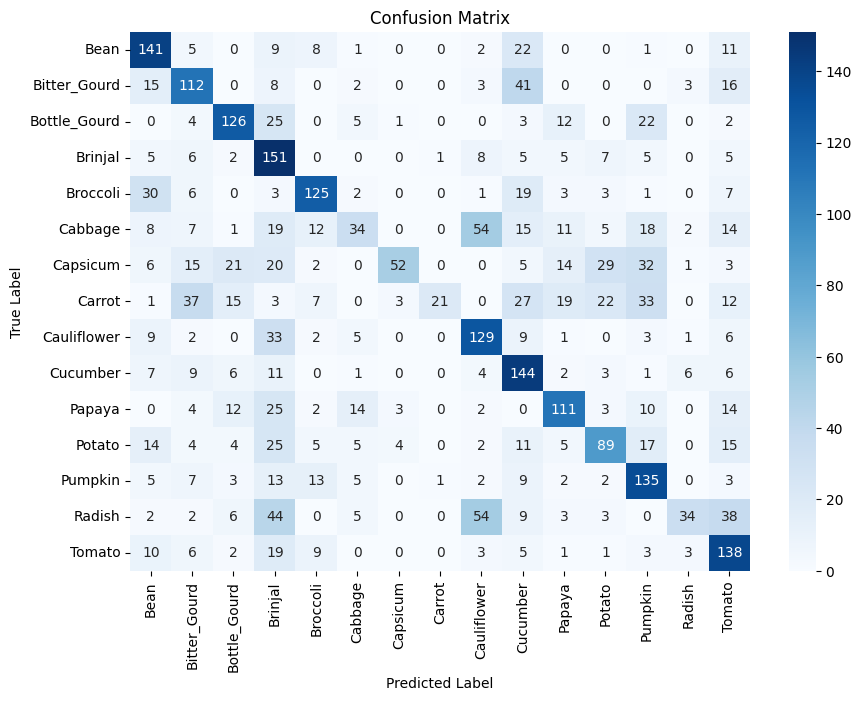

              precision    recall  f1-score   support

        Bean       0.56      0.70      0.62       200
Bitter_Gourd       0.50      0.56      0.53       200
Bottle_Gourd       0.64      0.63      0.63       200
     Brinjal       0.37      0.76      0.50       200
    Broccoli       0.68      0.62      0.65       200
     Cabbage       0.43      0.17      0.24       200
    Capsicum       0.83      0.26      0.40       200
      Carrot       0.91      0.10      0.19       200
 Cauliflower       0.49      0.65      0.56       200
    Cucumber       0.44      0.72      0.55       200
      Papaya       0.59      0.56      0.57       200
      Potato       0.53      0.45      0.49       200
     Pumpkin       0.48      0.68      0.56       200
      Radish       0.68      0.17      0.27       200
      Tomato       0.48      0.69      0.56       200

    accuracy                           0.51      3000
   macro avg       0.57      0.51      0.49      3000
weighted avg       0.57   

In [7]:
# Confusion Matrix on the Radish images before augementation
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the output
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Get the label to class mapping from the generator
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm, class_labels)

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [48]:
# history.history

## Data Augementation and Model Evaluation

In [87]:
#Flipping Data Verticall, Horizontally and Rotated 90 degree Only(Radish)
import os
import glob
from PIL import Image

def count_jpg_files_in_directory(directory):
    # Use glob to find .jpg files in the directory
    file_pattern = os.path.join(directory, '*.jpg')
    jpg_files = glob.glob(file_pattern)
    return len(jpg_files)

def convert_and_resize_image(image_path, output_path, flip=False, flip_horizontal=False, rotate=False):
    # Open the image with PIL
    img = Image.open(image_path)
    
    # Convert to grayscale
    img_gray = img.convert('L')
    
    # Optionally flip the image vertically
    if flip:
        img_gray = img_gray.transpose(Image.FLIP_TOP_BOTTOM)
    
    # Optionally flip the image horizontally
    if flip_horizontal:
        img_gray = img_gray.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Optionally rotate the image 90 degrees to the right
    if rotate:
        img_gray = img_gray.rotate(-90)
    
    # Resize the image
    img_resized = img_gray.resize((37, 37))
    
    # Save the resized image
    img_resized.save(output_path)

# Base directory for training data
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train'

# Subdirectories for each type of vegetable
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Directory to store processed images
output_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37'
os.makedirs(output_directory, exist_ok=True)

# Process each vegetable directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print(f"Processing {num_jpg_files} .jpg files in {directory}")
    
    # Create a subdirectory in the output directory
    output_vegetable_directory = os.path.join(output_directory, directory)
    os.makedirs(output_vegetable_directory, exist_ok=True)
    
    # Process each JPG file in the directory
    for jpg_file in glob.glob(os.path.join(directory_path, '*.jpg')):
        filename = os.path.splitext(os.path.basename(jpg_file))[0]
        output_path = os.path.join(output_vegetable_directory, f"{filename}_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_path)

        # Additional processing for 'Radish'
        if directory == 'Radish':
            # Vertically flipped image
            output_flipped_path = os.path.join(output_vegetable_directory, f"{filename}_flipped_resized_gray.jpg")
            convert_and_resize_image(jpg_file, output_flipped_path, flip=True)
            
            # Horizontally flipped image
            output_horizontal_path = os.path.join(output_vegetable_directory, f"{filename}_horizontal_resized_gray.jpg")
            convert_and_resize_image(jpg_file, output_horizontal_path, flip_horizontal=True)
            
            # Rotated 90 degrees to the right
            output_rotated_path = os.path.join(output_vegetable_directory, f"{filename}_rotated_resized_gray.jpg")
            convert_and_resize_image(jpg_file, output_rotated_path, rotate=True)
        
print("All images processed and saved in 'train_radish_37' directory.")

Processing 780 .jpg files in Bean
Processing 720 .jpg files in Bitter_Gourd
Processing 441 .jpg files in Bottle_Gourd
Processing 868 .jpg files in Brinjal
Processing 750 .jpg files in Broccoli
Processing 503 .jpg files in Cabbage
Processing 351 .jpg files in Capsicum
Processing 256 .jpg files in Carrot
Processing 587 .jpg files in Cauliflower
Processing 812 .jpg files in Cucumber
Processing 566 .jpg files in Papaya
Processing 377 .jpg files in Potato
Processing 814 .jpg files in Pumpkin
Processing 248 .jpg files in Radish
Processing 955 .jpg files in Tomato
All images processed and saved in 'train_radish_37' directory.


In [89]:
import os
import glob

def reduce_images_to_limit(directory, max_images):
    # Get all .jpg files in the directory
    jpg_files = glob.glob(os.path.join(directory, '*.jpg'))
    
    # Check the current number of images
    current_count = len(jpg_files)
    
    # Calculate how many files need to be deleted to meet the limit
    excess = current_count - max_images
    
    if excess > 0:
        # Sort the files by their modification time, newest first
        jpg_files.sort(key=os.path.getmtime, reverse=True)
        
        # Select the excess files
        files_to_delete = jpg_files[-excess:]
        
        # Delete the selected files
        for file in files_to_delete:
            os.remove(file)
            print(f"Deleted {file}")
    else:
        print("No need to delete any files, the count is within the limit.")

# Directory containing the images
image_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37\Radish'

# Maximum allowed number of images
max_images = 955

# Call the function to adjust the image count
reduce_images_to_limit(image_directory, max_images)


Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37\Radish\0047_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37\Radish\0045_flipped_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37\Radish\0045_horizontal_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37\Radish\0045_rotated_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37\Radish\0032_horizontal_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37\Radish\0032_rotated_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37\Radish\0045_resiz

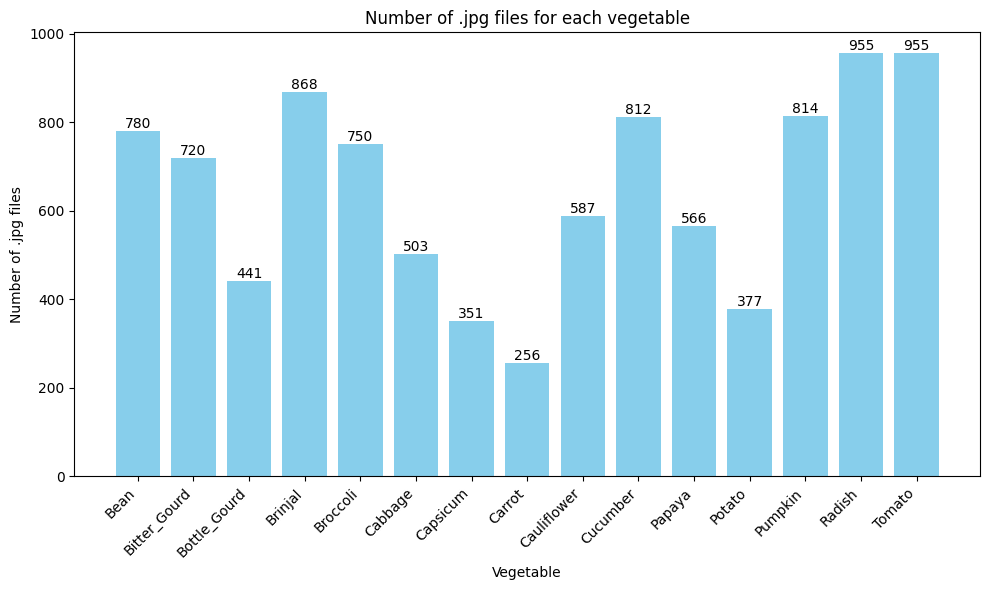

In [55]:
#Checking images in "Train_radish_37" folder
import os
import glob
import matplotlib.pyplot as plt

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

# Base directory containing the 15 directories
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37'

# List of 14 other directories
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Initialize lists to store vegetable names and their corresponding counts
vegetable_names = []
num_files = []

# Loop through each directory, count JPG files, and store the results
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    vegetable_names.append(directory)
    num_files.append(num_jpg_files)

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(vegetable_names, num_files, color='skyblue')
plt.xlabel('Vegetable')
plt.ylabel('Number of .jpg files')
plt.title('Number of .jpg files for each vegetable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding text labels
for bar, count in zip(bars, num_files):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()

In [8]:
#Testing model again but with new flipped vertical, horizontal and rotated 90 degrees to the right radish images.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle validation data
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    seed=seed
)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(37, 37, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(15, activation='softmax')  # Output layer with 15 units for each class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# print(model.summary())

# Now, you can use these generators in the fit function
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

# Optionally, evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)


Found 9735 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Epoch 1/10
305/305 [==============================] - 27s 83ms/step - loss: 2.5084 - accuracy: 0.1784 - val_loss: 2.3509 - val_accuracy: 0.2250
Epoch 2/10
305/305 [==============================] - 17s 56ms/step - loss: 2.2262 - accuracy: 0.2900 - val_loss: 2.2150 - val_accuracy: 0.2997
Epoch 3/10
305/305 [==============================] - 17s 56ms/step - loss: 2.0810 - accuracy: 0.3355 - val_loss: 2.0318 - val_accuracy: 0.3490
Epoch 4/10
305/305 [==============================] - 17s 55ms/step - loss: 1.9700 - accuracy: 0.3602 - val_loss: 1.9170 - val_accuracy: 0.3707
Epoch 5/10
305/305 [==============================] - 17s 57ms/step - loss: 1.9002 - accuracy: 0.3899 - val_loss: 1.9441 - val_accuracy: 0.3700
Epoch 6/10
305/305 [==============================] - 17s 57ms/step - loss: 1.8023 - accuracy: 0.4174 - val_loss: 1.7289 - val_accuracy: 0.4310
Epoch 7

## Loss remained to around 1.61 and Accuracy Remained around 48%
There does seems to be a negligible improvement to the model.

94/94 [==============================] - 1s 11ms/step


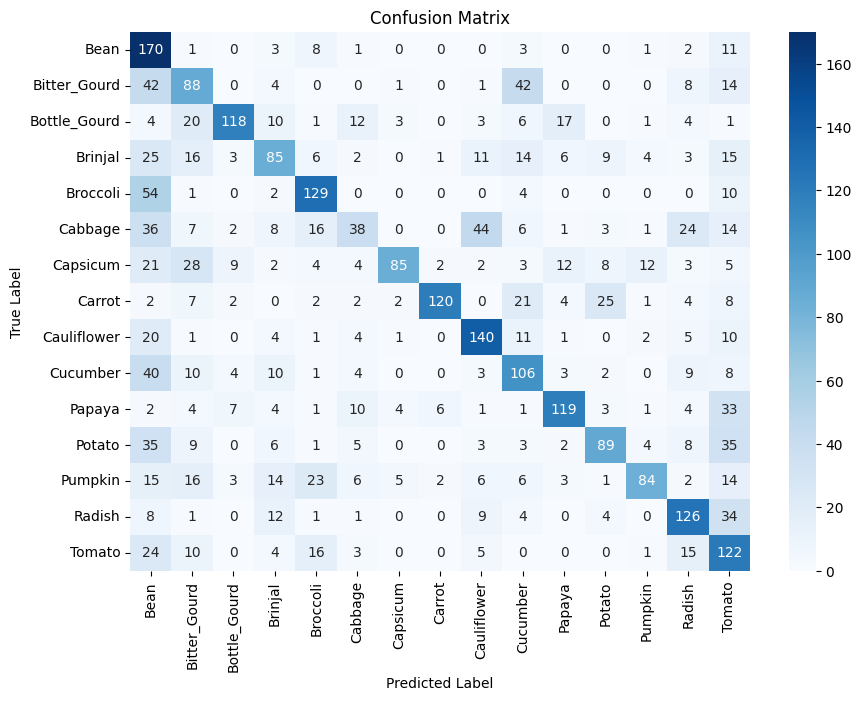

              precision    recall  f1-score   support

        Bean       0.34      0.85      0.49       200
Bitter_Gourd       0.40      0.44      0.42       200
Bottle_Gourd       0.80      0.59      0.68       200
     Brinjal       0.51      0.42      0.46       200
    Broccoli       0.61      0.65      0.63       200
     Cabbage       0.41      0.19      0.26       200
    Capsicum       0.84      0.42      0.56       200
      Carrot       0.92      0.60      0.73       200
 Cauliflower       0.61      0.70      0.65       200
    Cucumber       0.46      0.53      0.49       200
      Papaya       0.71      0.59      0.65       200
      Potato       0.62      0.45      0.52       200
     Pumpkin       0.75      0.42      0.54       200
      Radish       0.58      0.63      0.60       200
      Tomato       0.37      0.61      0.46       200

    accuracy                           0.54      3000
   macro avg       0.60      0.54      0.54      3000
weighted avg       0.60   

In [14]:
# Confusion Matrix after augumenting the Radish images
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the output
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Get the label to class mapping from the generator
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm, class_labels)

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Comparing the Correctly predict radish images before(34 images) to after augumenting the radish images to 955(126 images),
there is an small improvement to the correctly predicted redish images, which suggest that augumenting the data would be improve the model further.

The beans columns seems to have more wrongly predicted vegetables,, which may be caused by the augumentation of the radish images, that may have predicted the wrong vegetables.

## Augementation of the rest of the vegetables

In [15]:
#Augementation of the rest of the vegetables
import os
import glob
from PIL import Image

def count_jpg_files_in_directory(directory):
    # Use glob to find .jpg files in the directory
    file_pattern = os.path.join(directory, '*.jpg')
    jpg_files = glob.glob(file_pattern)
    return len(jpg_files)

def convert_and_resize_image(image_path, output_path, flip=False, flip_horizontal=False, rotate=False):
    # Open the image with PIL
    img = Image.open(image_path)
    
    # Convert to grayscale
    img_gray = img.convert('L')
    
    # Optionally flip the image vertically
    if flip:
        img_gray = img_gray.transpose(Image.FLIP_TOP_BOTTOM)
    
    # Optionally flip the image horizontally
    if flip_horizontal:
        img_gray = img_gray.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Optionally rotate the image 90 degrees to the right
    if rotate:
        img_gray = img_gray.rotate(-90)
    
    # Resize the image
    img_resized = img_gray.resize((37, 37))
    
    # Save the resized image
    img_resized.save(output_path)

# Base directory for training data
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train'

# Subdirectories for each type of vegetable
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Directory to store processed images
output_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
os.makedirs(output_directory, exist_ok=True)

# Process each vegetable directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print(f"Processing {num_jpg_files} .jpg files in {directory}")
    
    # Create a subdirectory in the output directory
    output_vegetable_directory = os.path.join(output_directory, directory)
    os.makedirs(output_vegetable_directory, exist_ok=True)
    
    # Process each JPG file in the directory
    for jpg_file in glob.glob(os.path.join(directory_path, '*.jpg')):
        filename = os.path.splitext(os.path.basename(jpg_file))[0]
        output_path = os.path.join(output_vegetable_directory, f"{filename}_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_path)

        # Vertically flipped image
        output_flipped_path = os.path.join(output_vegetable_directory, f"{filename}_flipped_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_flipped_path, flip=True)
        
        # Horizontally flipped image
        output_horizontal_path = os.path.join(output_vegetable_directory, f"{filename}_horizontal_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_horizontal_path, flip_horizontal=True)
        
        # Rotated 90 degrees to the right
        output_rotated_path = os.path.join(output_vegetable_directory, f"{filename}_rotated_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_rotated_path, rotate=True)
        
print("All images processed and saved in 'train_augmented_37' directory.")

Processing 780 .jpg files in Bean
Processing 720 .jpg files in Bitter_Gourd
Processing 441 .jpg files in Bottle_Gourd
Processing 868 .jpg files in Brinjal
Processing 750 .jpg files in Broccoli
Processing 503 .jpg files in Cabbage
Processing 351 .jpg files in Capsicum
Processing 256 .jpg files in Carrot
Processing 587 .jpg files in Cauliflower
Processing 812 .jpg files in Cucumber
Processing 566 .jpg files in Papaya
Processing 377 .jpg files in Potato
Processing 814 .jpg files in Pumpkin
Processing 248 .jpg files in Radish
Processing 955 .jpg files in Tomato
All images processed and saved in 'train_augmented_37' directory.


In [16]:
import os
import glob

def reduce_images_to_limit(directory, max_images):
    # Get all .jpg files in the directory
    jpg_files = glob.glob(os.path.join(directory, '*.jpg'))
    
    # Check the current number of images
    current_count = len(jpg_files)
    
    # Calculate how many files need to be deleted to meet the limit
    excess = current_count - max_images
    
    if excess > 0:
        # Sort the files by their modification time, newest first
        jpg_files.sort(key=os.path.getmtime, reverse=True)
        
        # Select the excess files
        files_to_delete = jpg_files[-excess:]
        
        # Delete the selected files
        for file in files_to_delete:
            os.remove(file)
            print(f"Deleted {file}")
    else:
        print(f"No need to delete any files in {directory}, the count is within the limit.")

# Base directory for augmented training data
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'

# Subdirectories for each type of vegetable
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Maximum allowed number of images
max_images = 955

# Process each vegetable directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    reduce_images_to_limit(directory_path, max_images)

Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37\Bean\1040_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37\Bean\1039_rotated_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37\Bean\1039_flipped_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37\Bean\1039_horizontal_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37\Bean\1039_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37\Bean\1038_rotated_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37\Bean\1038_horizonta

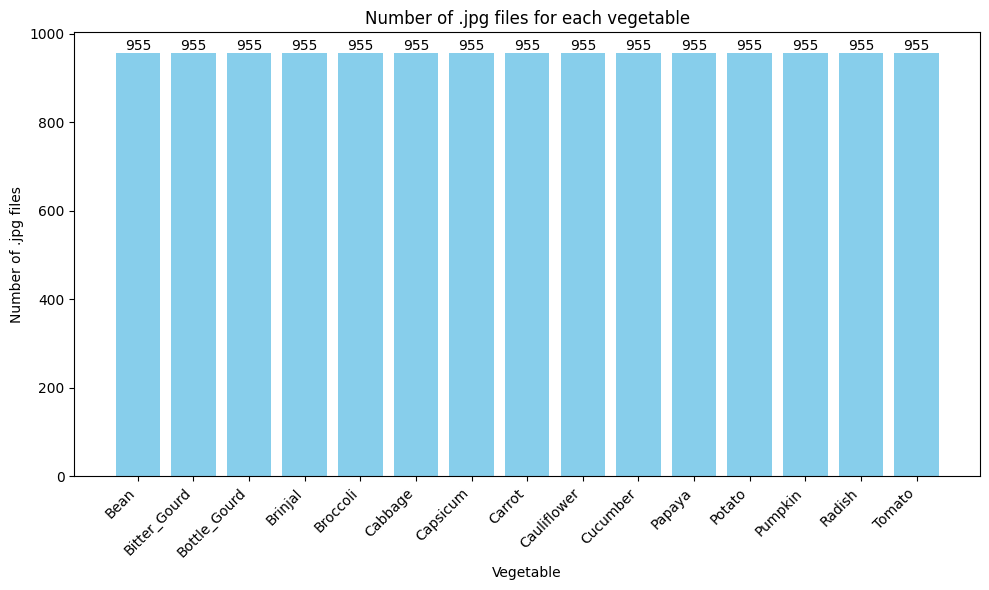

In [17]:
import os
import glob
import matplotlib.pyplot as plt

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

# Base directory containing the 15 directories
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'

# List of 15 directories
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Initialize lists to store vegetable names and their corresponding counts
vegetable_names = []
num_files = []

# Loop through each directory, count JPG files, and store the results
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    vegetable_names.append(directory)
    num_files.append(num_jpg_files)

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(vegetable_names, num_files, color='skyblue')
plt.xlabel('Vegetable')
plt.ylabel('Number of .jpg files')
plt.title('Number of .jpg files for each vegetable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding text labels
for bar, count in zip(bars, num_files):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle validation data
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    seed=seed
)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(37, 37, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(15, activation='softmax')  # Output layer with 15 units for each class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# print(model.summary())

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    verbose=1
)

# Optionally, evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)

Found 14325 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Epoch 1/10
448/448 [==============================] - 9s 20ms/step - loss: 2.5316 - accuracy: 0.1575 - val_loss: 2.3140 - val_accuracy: 0.2443
Epoch 2/10
448/448 [==============================] - 17s 37ms/step - loss: 2.2970 - accuracy: 0.2387 - val_loss: 2.2520 - val_accuracy: 0.2917
Epoch 3/10
448/448 [==============================] - 8s 18ms/step - loss: 2.1550 - accuracy: 0.2843 - val_loss: 1.8929 - val_accuracy: 0.4013
Epoch 4/10
448/448 [==============================] - 8s 18ms/step - loss: 2.0630 - accuracy: 0.3178 - val_loss: 1.8753 - val_accuracy: 0.3933
Epoch 5/10
448/448 [==============================] - 9s 20ms/step - loss: 1.9501 - accuracy: 0.3522 - val_loss: 1.7983 - val_accuracy: 0.4033
Epoch 6/10
448/448 [==============================] - 9s 19ms/step - loss: 1.9014 - accuracy: 0.3708 - val_loss: 1.6703 - val_accuracy: 0.4577
Epoch 7/10


#### The loss increased by a bit from 1.61 to 1.7, probably due to the augmentation of images, and the accuracy decreased slightly from 0.48 to 0.43.

In [80]:
# Optionally, evaluate on the test set again and print the error percentage
scores = model.evaluate(test_generator, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

CNN Error: 43.57%


94/94 [==============================] - 1s 10ms/step


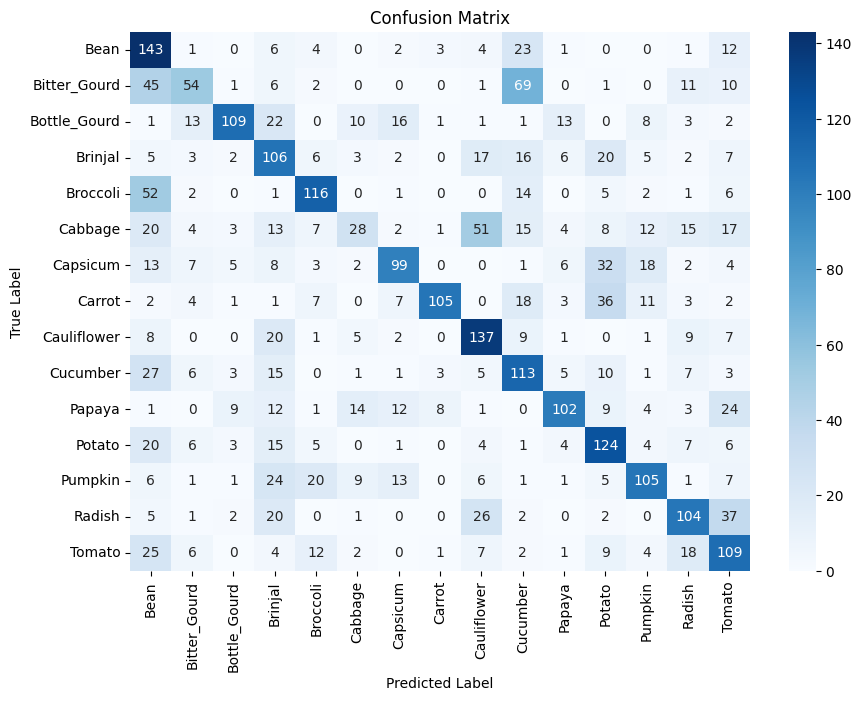

              precision    recall  f1-score   support

        Bean       0.38      0.71      0.50       200
Bitter_Gourd       0.50      0.27      0.35       200
Bottle_Gourd       0.78      0.55      0.64       200
     Brinjal       0.39      0.53      0.45       200
    Broccoli       0.63      0.58      0.60       200
     Cabbage       0.37      0.14      0.20       200
    Capsicum       0.63      0.49      0.55       200
      Carrot       0.86      0.53      0.65       200
 Cauliflower       0.53      0.69      0.60       200
    Cucumber       0.40      0.56      0.47       200
      Papaya       0.69      0.51      0.59       200
      Potato       0.48      0.62      0.54       200
     Pumpkin       0.60      0.53      0.56       200
      Radish       0.56      0.52      0.54       200
      Tomato       0.43      0.55      0.48       200

    accuracy                           0.52      3000
   macro avg       0.55      0.52      0.51      3000
weighted avg       0.55   

In [19]:
# Confusion Matrix after augumenting the Radish images
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the output
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Get the label to class mapping from the generator
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm, class_labels)

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

#### Generally, after augmenting the rest of the vegetables, the correctly predicted vegetable for pumpkin(84 to 105), potato(89 to 124) and Brinjal(85-126) had the most significant improvement, and the wrongly predicted bean images were also reduced slightly.

#### However, it seems like the model wrongly predicted more bitter_gourd as cucumber (42 to 69), likely because the shape is similar
#### Also with Cauliflower and cabbage (44 to 51)

## Tuning Model/Model Improvement

#### Using grid search to find the best hyperparameters.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner.tuners import RandomSearch

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Define a function to create the Keras model with hyperparameters
def build_model(hp):
    model = Sequential([
        Conv2D(hp.Int('filters_1', 32, 64, step=16), (3, 3), activation='relu', input_shape=(37, 37, 1)),
        MaxPooling2D(2, 2),
        Conv2D(hp.Int('filters_2', 32, 64, step=16), (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(hp.Int('units', 128, 256, step=64), activation='relu'),
        Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)),
        Dense(15, activation='softmax')
    ])
    
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='vegetable_classification'
)

# Perform hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Optionally, evaluate on the test set
test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Evaluate the best model
test_accuracy = best_model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)

# Print the CNN error
scores = best_model.evaluate(test_generator, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

# Same as the above but displays hyperparameters also

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner.tuners import RandomSearch

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Define a function to create the Keras model with hyperparameters
def build_model(hp):
    model = Sequential([
        Conv2D(hp.Int('filters_1', 32, 64, step=16), (3, 3), activation='relu', input_shape=(37, 37, 1)),
        MaxPooling2D(2, 2),
        Conv2D(hp.Int('filters_2', 32, 64, step=16), (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(hp.Int('units', 128, 256, step=64), activation='relu'),
        Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)),
        Dense(15, activation='softmax')
    ])
    
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='vegetable_classification'
)

# Perform hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"filters_1: {best_hyperparameters.get('filters_1')}")
print(f"filters_2: {best_hyperparameters.get('filters_2')}")
print(f"units: {best_hyperparameters.get('units')}")
print(f"dropout_rate: {best_hyperparameters.get('dropout_rate')}")
print(f"optimizer: {best_hyperparameters.get('optimizer')}")

# Optionally, evaluate on the test set
test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Evaluate the best model
test_accuracy = best_model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)

# Print the CNN error
scores = best_model.evaluate(test_generator, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

Trial 10 Complete [00h 01m 05s]
val_accuracy: 0.652999997138977

Best val_accuracy So Far: 0.7546666860580444
Total elapsed time: 00h 12m 27s
Best Hyperparameters:
filters_1: 64
filters_2: 64
units: 256
dropout_rate: 0.3
optimizer: adam
Found 3000 images belonging to 15 classes.
94/94 [==============================] - 1s 8ms/step - loss: 0.8334 - accuracy: 0.7507
Test Accuracy: [0.8334488272666931, 0.7506666779518127]
CNN Error: 24.93%


#### Running the base model again with the best hyperparameters

In [21]:
# Base Model with best hyperparameters
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle validation data
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    seed=seed
)

# Define the CNN architecture with the best hyperparameters
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(37, 37, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Use the best dropout rate
    Dense(15, activation='softmax')
])

# Compile the model with the best optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    verbose=1
)

# Evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)


Found 14325 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 35, 35, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0

After tuning the hyperparameters from the base model, the loss actually decreased from 1.7 to 1.03 and the accuracy improved from 0.43 to 0.65

This suggest that these new hyperparameter really helps to improve the model.

In [96]:
# #Increase the Number of Epochs.
# Use Learning Rate Scheduling.
# Early Stopping.
# Enhanced Data Augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data with enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2,  # Add height shift
    horizontal_flip=True,
    vertical_flip=True  # Add vertical flip
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle validation data
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(37, 37),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    seed=seed
)

# Define the CNN architecture with the best hyperparameters
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(37, 37, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Use the best dropout rate
    Dense(15, activation='softmax')
])

# Compile the model with the best optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=100,  # Increase number of epochs
    validation_data=validation_generator,
    verbose=1,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)

Found 14325 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Model: "sequential_197"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 35, 35, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

#### After Increase the Number of Epochs, Use Learning Rate Scheduling,  Early Stopping, and Enhanced Data Augmentation, the accuracy actually managed to improve a bit more from 0.65 to 0.67.

## Converting 131 by 131 pixel images/ Training the Model

In [1]:
import os
import glob
from PIL import Image

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

def convert_and_resize_image(image_path, output_path, size=(131, 131)):
    # Open the image using PIL
    img = Image.open(image_path)
    
    # Convert the image to grayscale
    img_gray = img.convert('L')
    
    # Resize the image to the specified size
    img_resized = img_gray.resize(size)
    
    # Save the resized image
    img_resized.save(output_path)

def process_images(base_directory, output_directory, directories, size=(131, 131)):
    os.makedirs(output_directory, exist_ok=True)

    # Loop through each directory, process images, and save them in the output directory
    for directory in directories:
        directory_path = os.path.join(base_directory, directory)
        num_jpg_files = count_jpg_files_in_directory(directory_path)
        print("Processing", num_jpg_files, ".jpg files in", directory)
        
        # Create a subdirectory for each vegetable in the output directory
        output_vegetable_directory = os.path.join(output_directory, directory)
        os.makedirs(output_vegetable_directory, exist_ok=True)
        
        # Loop through each jpg file in the directory
        for jpg_file in glob.glob(os.path.join(directory_path, '*.jpg')):
            # Get the filename without extension
            filename = os.path.splitext(os.path.basename(jpg_file))[0]
            
            # Define output path for the resized and grayscale image
            output_path = os.path.join(output_vegetable_directory, filename + '_resized_gray.jpg')
            
            # Convert and resize the image
            convert_and_resize_image(jpg_file, output_path, size)

# Directories to process
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Base and output directories for train, validation, and test sets
datasets = {
    "train": r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train',
    "validation": r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation',
    "test": r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test'
}

output_base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1'

# Process each dataset
for dataset_type, base_directory in datasets.items():
    output_directory = os.path.join(output_base_directory, f"{dataset_type}_131")
    process_images(base_directory, output_directory, directories, size=(131, 131))

print("All images processed and saved in respective directories.")

Processing 780 .jpg files in Bean
Processing 720 .jpg files in Bitter_Gourd
Processing 441 .jpg files in Bottle_Gourd
Processing 868 .jpg files in Brinjal
Processing 750 .jpg files in Broccoli
Processing 503 .jpg files in Cabbage
Processing 351 .jpg files in Capsicum
Processing 256 .jpg files in Carrot
Processing 587 .jpg files in Cauliflower
Processing 812 .jpg files in Cucumber
Processing 566 .jpg files in Papaya
Processing 377 .jpg files in Potato
Processing 814 .jpg files in Pumpkin
Processing 248 .jpg files in Radish
Processing 955 .jpg files in Tomato
Processing 200 .jpg files in Bean
Processing 200 .jpg files in Bitter_Gourd
Processing 200 .jpg files in Bottle_Gourd
Processing 200 .jpg files in Brinjal
Processing 200 .jpg files in Broccoli
Processing 200 .jpg files in Cabbage
Processing 200 .jpg files in Capsicum
Processing 200 .jpg files in Carrot
Processing 200 .jpg files in Cauliflower
Processing 200 .jpg files in Cucumber
Processing 200 .jpg files in Papaya
Processing 200 .j

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set a fixed seed value
seed = 1
tf.random.set_seed(seed)

In [3]:
# Base Model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set a fixed seed value
seed = 1
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_131'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_131'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_131'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(131, 131),  # Update target size to 131x131
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(131, 131),  # Update target size to 131x131
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle validation data
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(131, 131),  # Update target size to 131x131
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    seed=seed
)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(131, 131, 1)),  # Update input shape to 131x131
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(15, activation='softmax')  # Output layer with 15 units for each class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Now, you can use these generators in the fit function
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

# Optionally, evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)


Found 9028 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 129, 129, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0   

94/94 [==============================] - 2s 26ms/step


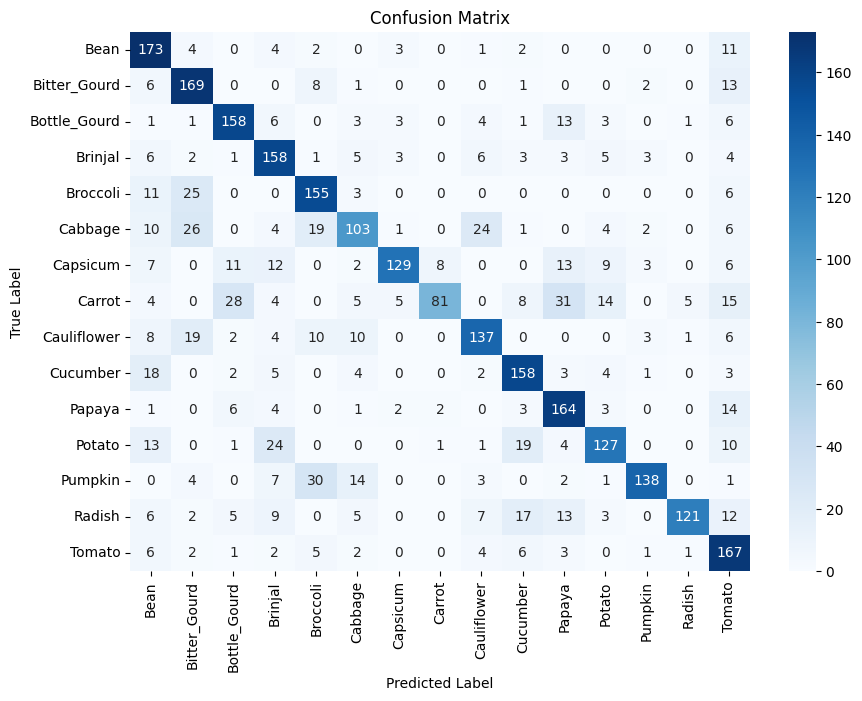

              precision    recall  f1-score   support

        Bean       0.64      0.86      0.74       200
Bitter_Gourd       0.67      0.84      0.74       200
Bottle_Gourd       0.73      0.79      0.76       200
     Brinjal       0.65      0.79      0.71       200
    Broccoli       0.67      0.78      0.72       200
     Cabbage       0.65      0.52      0.58       200
    Capsicum       0.88      0.65      0.75       200
      Carrot       0.88      0.41      0.55       200
 Cauliflower       0.72      0.69      0.70       200
    Cucumber       0.72      0.79      0.75       200
      Papaya       0.66      0.82      0.73       200
      Potato       0.73      0.64      0.68       200
     Pumpkin       0.90      0.69      0.78       200
      Radish       0.94      0.60      0.74       200
      Tomato       0.60      0.83      0.70       200

    accuracy                           0.71      3000
   macro avg       0.74      0.71      0.71      3000
weighted avg       0.74   

In [5]:
#Confusion Matrix Before Augmentation
# Confusion Matrix on the Radish images before augementation
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the output
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Get the label to class mapping from the generator
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm, class_labels)

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Data Augmentation/ Model Evaluation

In [6]:
import os
import glob
from PIL import Image

def count_jpg_files_in_directory(directory):
    # Use glob to find .jpg files in the directory
    file_pattern = os.path.join(directory, '*.jpg')
    jpg_files = glob.glob(file_pattern)
    return len(jpg_files)

def convert_and_resize_image(image_path, output_path, flip=False, flip_horizontal=False, rotate=False):
    # Open the image with PIL
    img = Image.open(image_path)
    
    # Convert to grayscale
    img_gray = img.convert('L')
    
    # Optionally flip the image vertically
    if flip:
        img_gray = img_gray.transpose(Image.FLIP_TOP_BOTTOM)
    
    # Optionally flip the image horizontally
    if flip_horizontal:
        img_gray = img_gray.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Optionally rotate the image 90 degrees to the right
    if rotate:
        img_gray = img_gray.rotate(-90)
    
    # Resize the image to 131x131
    img_resized = img_gray.resize((131, 131))
    
    # Save the resized image
    img_resized.save(output_path)

# Base directory for training data
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train'

# Subdirectories for each type of vegetable
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Directory to store processed images
output_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131'
os.makedirs(output_directory, exist_ok=True)

# Process each vegetable directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print(f"Processing {num_jpg_files} .jpg files in {directory}")
    
    # Create a subdirectory in the output directory
    output_vegetable_directory = os.path.join(output_directory, directory)
    os.makedirs(output_vegetable_directory, exist_ok=True)
    
    # Process each JPG file in the directory
    for jpg_file in glob.glob(os.path.join(directory_path, '*.jpg')):
        filename = os.path.splitext(os.path.basename(jpg_file))[0]
        output_path = os.path.join(output_vegetable_directory, f"{filename}_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_path)

        # Additional processing for 'Radish'
        if directory == 'Radish':
            # Vertically flipped image
            output_flipped_path = os.path.join(output_vegetable_directory, f"{filename}_flipped_resized_gray.jpg")
            convert_and_resize_image(jpg_file, output_flipped_path, flip=True)
            
            # Horizontally flipped image
            output_horizontal_path = os.path.join(output_vegetable_directory, f"{filename}_horizontal_resized_gray.jpg")
            convert_and_resize_image(jpg_file, output_horizontal_path, flip_horizontal=True)
            
            # Rotated 90 degrees to the right
            output_rotated_path = os.path.join(output_vegetable_directory, f"{filename}_rotated_resized_gray.jpg")
            convert_and_resize_image(jpg_file, output_rotated_path, rotate=True)
        
print("All images processed and saved in 'train_radish_131' directory.")


Processing 780 .jpg files in Bean
Processing 720 .jpg files in Bitter_Gourd
Processing 441 .jpg files in Bottle_Gourd
Processing 868 .jpg files in Brinjal
Processing 750 .jpg files in Broccoli
Processing 503 .jpg files in Cabbage
Processing 351 .jpg files in Capsicum
Processing 256 .jpg files in Carrot
Processing 587 .jpg files in Cauliflower
Processing 812 .jpg files in Cucumber
Processing 566 .jpg files in Papaya
Processing 377 .jpg files in Potato
Processing 814 .jpg files in Pumpkin
Processing 248 .jpg files in Radish
Processing 955 .jpg files in Tomato
All images processed and saved in 'train_radish_131' directory.


In [7]:
# Delete excess Radish augmented images
import os
import glob

def reduce_images_to_limit(directory, max_images):
    # Get all .jpg files in the directory
    jpg_files = glob.glob(os.path.join(directory, '*.jpg'))
    
    # Check the current number of images
    current_count = len(jpg_files)
    
    # Calculate how many files need to be deleted to meet the limit
    excess = current_count - max_images
    
    if excess > 0:
        # Sort the files by their modification time, newest first
        jpg_files.sort(key=os.path.getmtime, reverse=True)
        
        # Select the excess files
        files_to_delete = jpg_files[-excess:]
        
        # Delete the selected files
        for file in files_to_delete:
            os.remove(file)
            print(f"Deleted {file}")
    else:
        print("No need to delete any files, the count is within the limit.")

# Directory containing the images
image_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131\Radish'

# Maximum allowed number of images
max_images = 955

# Call the function to adjust the image count
reduce_images_to_limit(image_directory, max_images)


Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131\Radish\0046_horizontal_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131\Radish\0046_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131\Radish\0045_flipped_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131\Radish\0045_horizontal_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131\Radish\0045_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131\Radish\0032_flipped_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131\Radish\0032_horizo

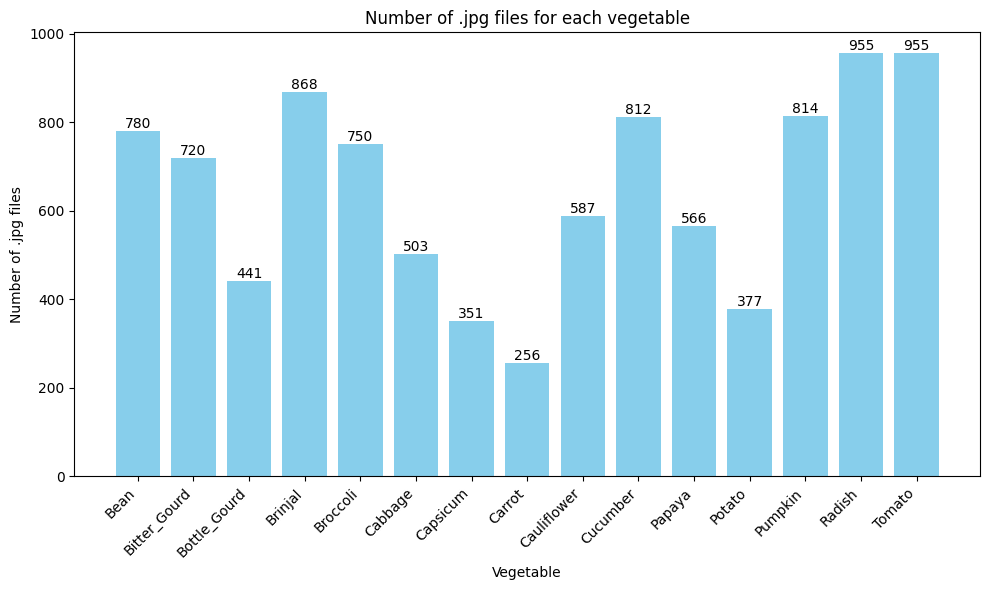

In [10]:
import os
import glob
import matplotlib.pyplot as plt

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

# Base directory containing the 15 directories
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131'

# List of 15 directories
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Initialize lists to store vegetable names and their corresponding counts
vegetable_names = []
num_files = []

# Loop through each directory, count JPG files, and store the results
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    vegetable_names.append(directory)
    num_files.append(num_jpg_files)

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(vegetable_names, num_files, color='skyblue')
plt.xlabel('Vegetable')
plt.ylabel('Number of .jpg files')
plt.title('Number of .jpg files for each vegetable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding text labels
for bar, count in zip(bars, num_files):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_radish_131'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_131'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_131'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(131, 131),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(131, 131),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle validation data
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(131, 131),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    seed=seed
)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(131, 131, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(15, activation='softmax')  # Output layer with 15 units for each class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary (optional)
# print(model.summary())

# Now, you can use these generators in the fit function
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

# Optionally, evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)

Found 9735 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Epoch 1/10
305/305 [==============================] - 23s 74ms/step - loss: 2.4894 - accuracy: 0.1858 - val_loss: 2.1533 - val_accuracy: 0.3230
Epoch 2/10
305/305 [==============================] - 21s 68ms/step - loss: 2.0837 - accuracy: 0.3251 - val_loss: 1.7788 - val_accuracy: 0.4340
Epoch 3/10
305/305 [==============================] - 20s 65ms/step - loss: 1.8578 - accuracy: 0.4073 - val_loss: 1.5692 - val_accuracy: 0.5193
Epoch 4/10
305/305 [==============================] - 20s 67ms/step - loss: 1.6864 - accuracy: 0.4592 - val_loss: 1.4118 - val_accuracy: 0.5560
Epoch 5/10
305/305 [==============================] - 20s 64ms/step - loss: 1.5716 - accuracy: 0.4954 - val_loss: 1.3649 - val_accuracy: 0.5763
Epoch 6/10
305/305 [==============================] - 27s 89ms/step - loss: 1.4678 - accuracy: 0.5249 - val_loss: 1.2988 - val_accuracy: 0.5957
Epoch 7

94/94 [==============================] - 2s 23ms/step


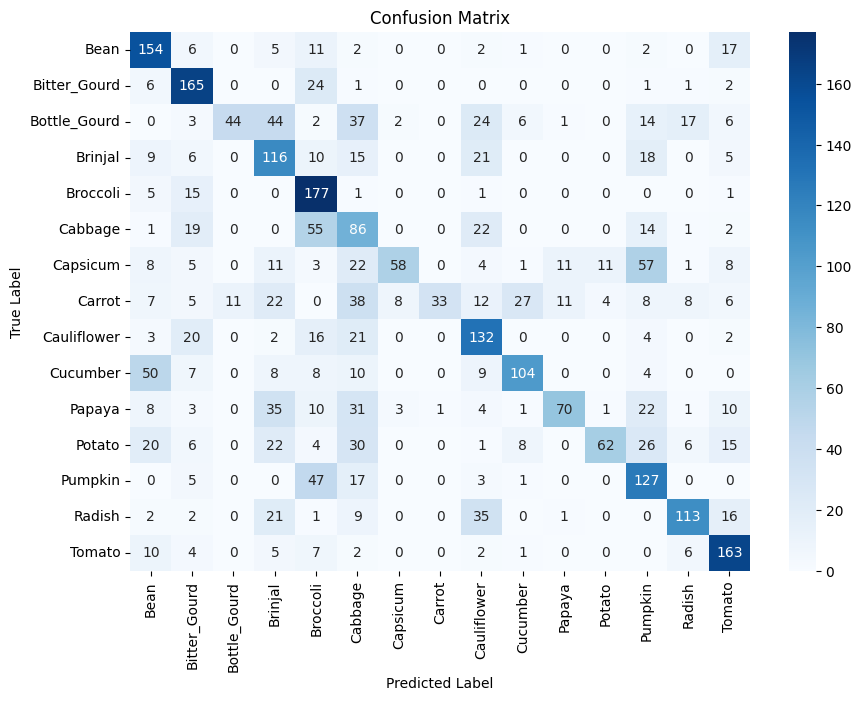

              precision    recall  f1-score   support

        Bean       0.54      0.77      0.64       200
Bitter_Gourd       0.61      0.82      0.70       200
Bottle_Gourd       0.80      0.22      0.35       200
     Brinjal       0.40      0.58      0.47       200
    Broccoli       0.47      0.89      0.62       200
     Cabbage       0.27      0.43      0.33       200
    Capsicum       0.82      0.29      0.43       200
      Carrot       0.97      0.17      0.28       200
 Cauliflower       0.49      0.66      0.56       200
    Cucumber       0.69      0.52      0.59       200
      Papaya       0.74      0.35      0.48       200
      Potato       0.79      0.31      0.45       200
     Pumpkin       0.43      0.64      0.51       200
      Radish       0.73      0.56      0.64       200
      Tomato       0.64      0.81      0.72       200

    accuracy                           0.53      3000
   macro avg       0.63      0.53      0.52      3000
weighted avg       0.63   

In [12]:
# Confusion Matrix after augumenting the Radish images
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the output
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Get the label to class mapping from the generator
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm, class_labels)

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Augmentation of the rest of the 131x131 vegetable images

In [13]:
import os
import glob
from PIL import Image

def count_jpg_files_in_directory(directory):
    # Use glob to find .jpg files in the directory
    file_pattern = os.path.join(directory, '*.jpg')
    jpg_files = glob.glob(file_pattern)
    return len(jpg_files)

def convert_and_resize_image(image_path, output_path, flip=False, flip_horizontal=False, rotate=False):
    # Open the image with PIL
    img = Image.open(image_path)
    
    # Convert to grayscale
    img_gray = img.convert('L')
    
    # Optionally flip the image vertically
    if flip:
        img_gray = img_gray.transpose(Image.FLIP_TOP_BOTTOM)
    
    # Optionally flip the image horizontally
    if flip_horizontal:
        img_gray = img_gray.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Optionally rotate the image 90 degrees to the right
    if rotate:
        img_gray = img_gray.rotate(-90)
    
    # Resize the image
    img_resized = img_gray.resize((131, 131))
    
    # Save the resized image
    img_resized.save(output_path)

# Base directory for training data
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train'

# Subdirectories for each type of vegetable
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Directory to store processed images
output_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131'
os.makedirs(output_directory, exist_ok=True)

# Process each vegetable directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    print(f"Processing {num_jpg_files} .jpg files in {directory}")
    
    # Create a subdirectory in the output directory
    output_vegetable_directory = os.path.join(output_directory, directory)
    os.makedirs(output_vegetable_directory, exist_ok=True)
    
    # Process each JPG file in the directory
    for jpg_file in glob.glob(os.path.join(directory_path, '*.jpg')):
        filename = os.path.splitext(os.path.basename(jpg_file))[0]
        output_path = os.path.join(output_vegetable_directory, f"{filename}_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_path)

        # Vertically flipped image
        output_flipped_path = os.path.join(output_vegetable_directory, f"{filename}_flipped_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_flipped_path, flip=True)
        
        # Horizontally flipped image
        output_horizontal_path = os.path.join(output_vegetable_directory, f"{filename}_horizontal_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_horizontal_path, flip_horizontal=True)
        
        # Rotated 90 degrees to the right
        output_rotated_path = os.path.join(output_vegetable_directory, f"{filename}_rotated_resized_gray.jpg")
        convert_and_resize_image(jpg_file, output_rotated_path, rotate=True)
        
print("All images processed and saved in 'train_augmented_131' directory.")


Processing 780 .jpg files in Bean
Processing 720 .jpg files in Bitter_Gourd
Processing 441 .jpg files in Bottle_Gourd
Processing 868 .jpg files in Brinjal
Processing 750 .jpg files in Broccoli
Processing 503 .jpg files in Cabbage
Processing 351 .jpg files in Capsicum
Processing 256 .jpg files in Carrot
Processing 587 .jpg files in Cauliflower
Processing 812 .jpg files in Cucumber
Processing 566 .jpg files in Papaya
Processing 377 .jpg files in Potato
Processing 814 .jpg files in Pumpkin
Processing 248 .jpg files in Radish
Processing 955 .jpg files in Tomato
All images processed and saved in 'train_augmented_131' directory.


In [14]:
import os
import glob

def reduce_images_to_limit(directory, max_images):
    # Get all .jpg files in the directory
    jpg_files = glob.glob(os.path.join(directory, '*.jpg'))
    
    # Check the current number of images
    current_count = len(jpg_files)
    
    # Calculate how many files need to be deleted to meet the limit
    excess = current_count - max_images
    
    if excess > 0:
        # Sort the files by their modification time, newest first
        jpg_files.sort(key=os.path.getmtime, reverse=True)
        
        # Select the excess files
        files_to_delete = jpg_files[-excess:]
        
        # Delete the selected files
        for file in files_to_delete:
            os.remove(file)
            print(f"Deleted {file}")
    else:
        print(f"No need to delete any files in {directory}, the count is within the limit.")

# Base directory for augmented training data with 131x131 images
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131'

# Subdirectories for each type of vegetable
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Maximum allowed number of images
max_images = 955

# Process each vegetable directory
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    reduce_images_to_limit(directory_path, max_images)


Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131\Bean\1039_rotated_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131\Bean\1040_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131\Bean\1039_flipped_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131\Bean\1039_horizontal_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131\Bean\1039_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131\Bean\1038_rotated_resized_gray.jpg
Deleted C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131\Bean\1038_ho

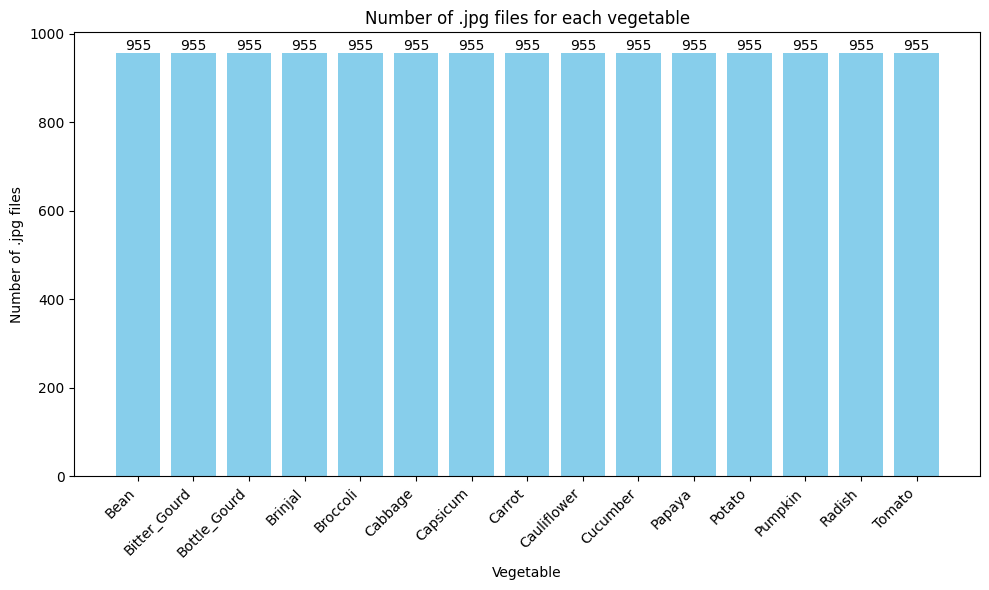

In [15]:
import os
import glob
import matplotlib.pyplot as plt

def count_jpg_files_in_directory(directory):
    # Join the directory path with the file pattern
    file_pattern = os.path.join(directory, '*.jpg')
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(file_pattern)
    
    # Count the number of JPG files found
    num_jpg_files = len(jpg_files)
    
    return num_jpg_files

# Base directory containing the 15 directories
base_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131'

# List of 15 directories
directories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Initialize lists to store vegetable names and their corresponding counts
vegetable_names = []
num_files = []

# Loop through each directory, count JPG files, and store the results
for directory in directories:
    directory_path = os.path.join(base_directory, directory)
    num_jpg_files = count_jpg_files_in_directory(directory_path)
    vegetable_names.append(directory)
    num_files.append(num_jpg_files)

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(vegetable_names, num_files, color='skyblue')
plt.xlabel('Vegetable')
plt.ylabel('Number of .jpg files')
plt.title('Number of .jpg files for each vegetable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding text labels
for bar, count in zip(bars, num_files):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()


In [16]:
#train model again with train_augmented_131
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_131'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_131'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(131, 131),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(131, 131),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle validation data
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(131, 131),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    seed=seed
)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(131, 131, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(15, activation='softmax')  # Output layer with 15 units for each class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# print(model.summary())

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    verbose=1
)

# Optionally, evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)


Found 14325 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Epoch 1/10
448/448 [==============================] - 36s 78ms/step - loss: 2.5287 - accuracy: 0.1611 - val_loss: 2.0685 - val_accuracy: 0.3527
Epoch 2/10
448/448 [==============================] - 29s 65ms/step - loss: 2.1068 - accuracy: 0.2914 - val_loss: 1.7599 - val_accuracy: 0.4437
Epoch 3/10
448/448 [==============================] - 41s 91ms/step - loss: 1.8505 - accuracy: 0.3824 - val_loss: 1.6095 - val_accuracy: 0.4747
Epoch 4/10
448/448 [==============================] - 29s 64ms/step - loss: 1.6540 - accuracy: 0.4447 - val_loss: 1.2375 - val_accuracy: 0.5940
Epoch 5/10
448/448 [==============================] - 30s 67ms/step - loss: 1.5352 - accuracy: 0.4923 - val_loss: 1.2046 - val_accuracy: 0.6143
Epoch 6/10
448/448 [==============================] - 30s 67ms/step - loss: 1.4596 - accuracy: 0.5101 - val_loss: 1.2270 - val_accuracy: 0.6103
Epoch 

94/94 [==============================] - 3s 27ms/step


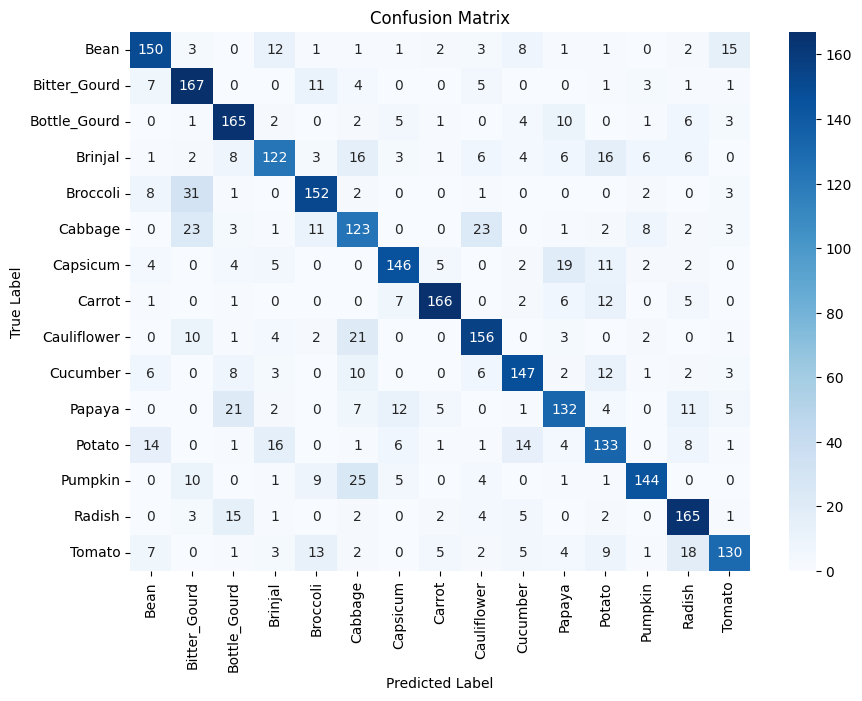

              precision    recall  f1-score   support

        Bean       0.76      0.75      0.75       200
Bitter_Gourd       0.67      0.83      0.74       200
Bottle_Gourd       0.72      0.82      0.77       200
     Brinjal       0.71      0.61      0.66       200
    Broccoli       0.75      0.76      0.76       200
     Cabbage       0.57      0.61      0.59       200
    Capsicum       0.79      0.73      0.76       200
      Carrot       0.88      0.83      0.86       200
 Cauliflower       0.74      0.78      0.76       200
    Cucumber       0.77      0.73      0.75       200
      Papaya       0.70      0.66      0.68       200
      Potato       0.65      0.67      0.66       200
     Pumpkin       0.85      0.72      0.78       200
      Radish       0.72      0.82      0.77       200
      Tomato       0.78      0.65      0.71       200

    accuracy                           0.73      3000
   macro avg       0.74      0.73      0.73      3000
weighted avg       0.74   

In [17]:
# Confusion Matrix after augumenting the Radish images
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the output
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Get the label to class mapping from the generator
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm, class_labels)

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Hyperparameter Tuning Using Grid Search for 131x131 data

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner.tuners import RandomSearch

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_131'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_131'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_131'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(131, 131),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(131, 131),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Define a function to create the Keras model with hyperparameters
def build_model(hp):
    model = Sequential([
        Conv2D(hp.Int('filters_1', 32, 64, step=16), (3, 3), activation='relu', input_shape=(131, 131, 1)),
        MaxPooling2D(2, 2),
        Conv2D(hp.Int('filters_2', 32, 64, step=16), (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(hp.Int('units', 128, 256, step=64), activation='relu'),
        Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)),
        Dense(15, activation='softmax')
    ])
    
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='vegetable_classification'
)

# Perform hyperparameter tuning
tuner.search(train_generator, epochs=10, validation_data=validation_generator)

# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"filters_1: {best_hyperparameters.get('filters_1')}")
print(f"filters_2: {best_hyperparameters.get('filters_2')}")
print(f"units: {best_hyperparameters.get('units')}")
print(f"dropout_rate: {best_hyperparameters.get('dropout_rate')}")
print(f"optimizer: {best_hyperparameters.get('optimizer')}")


Found 14325 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Reloading Tuner from hyperparameter_tuning\vegetable_classification\tuner0.json
Best Hyperparameters:
filters_1: 64
filters_2: 64
units: 256
dropout_rate: 0.3
optimizer: adam


In [97]:
#Fit the mode with the best hyperparameters
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Define the CNN architecture with the best hyperparameters
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(131, 131, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Use the best dropout rate
    Dense(15, activation='softmax')
])

# Compile the model with the best optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    verbose=1
)

# Evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)


Found 14325 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Model: "sequential_198"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 129, 129, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 61504)            

In [98]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data with enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2,  # Add height shift
    horizontal_flip=True,
    vertical_flip=True  # Add vertical flip
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Define the CNN architecture with the best hyperparameters
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(131, 131, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Use the best dropout rate
    Dense(15, activation='softmax')
])

# Compile the model with the best optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=100,  # Increase number of epochs
    validation_data=validation_generator,
    verbose=1,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy)
print(history)


Found 14325 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Model: "sequential_199"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 129, 129, 64)      640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 61504)            

In [104]:
#Running the model again and saving the best weights
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Set the seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Set the paths to the directories where the images are stored
train_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\train_augmented_37'
validation_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\validation_37'
test_directory = r'C:\Users\lhchu\OneDrive\Desktop\DAAA (SP)2A03\DELE\Dataset for CA1 part A - AY2425S1\test_37'

# Set up the ImageDataGenerator for training data with enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2,  # Add height shift
    horizontal_flip=True,
    vertical_flip=True  # Add vertical flip
)

# Set up the ImageDataGenerator for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators to read images from the directories
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

validation_generator = validation_test_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

test_generator = validation_test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(131, 131),  # Adjusted target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Define the CNN architecture with the best hyperparameters
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(131, 131, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Use the best dropout rate
    Dense(15, activation='softmax')
])

# Compile the model with the best optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Callbacks for learning rate reduction, early stopping, and model checkpointing
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_path = "best_vegetable_weights.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=100,  # Increase number of epochs
    validation_data=validation_generator,
    verbose=1,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

# After training, load the best weights using the following line
model.load_weights(checkpoint_path)

# Evaluate on the test set
test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Accuracy:", test_accuracy[1])


Found 14325 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Model: "sequential_205"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 129, 129, 64)      640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 61504)            

-Part A
Augementation
Confusion Matrix evaluation
Model Improvement /Tuning

-Part B
-Jupyter Notbook for data processing
- refer to lab 1/ good review/bad review

# Exploratory Data Analysis

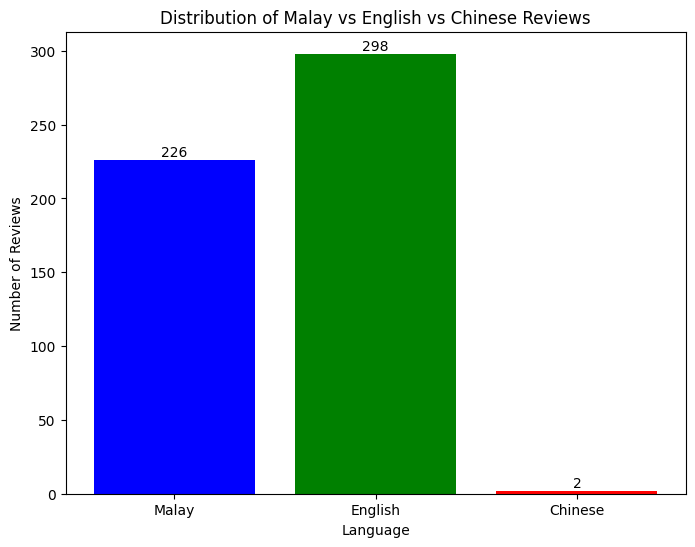

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Filter the DataFrame for Malay, English, and Chinese reviews
malay_reviews = data[data['Language'] == 'Malay']
english_reviews = data[data['Language'] == 'English']
chinese_reviews = data[data['Language'] == 'Chinese']

# Count the number of reviews for each language
malay_count = malay_reviews.shape[0]
english_count = english_reviews.shape[0]
chinese_count = chinese_reviews.shape[0]

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(['Malay', 'English', 'Chinese'], [malay_count, english_count, chinese_count], color=['blue', 'green', 'red'])
plt.xlabel('Language')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Malay vs English vs Chinese Reviews')

# Annotate bars with counts
for i, count in enumerate([malay_count, english_count, chinese_count]):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


plt.show()



It seems like English reviews make up the majority of the dataset, to make the model predict better, i will remove both the 'Malay' reviews and the 'Chinese' reviews.

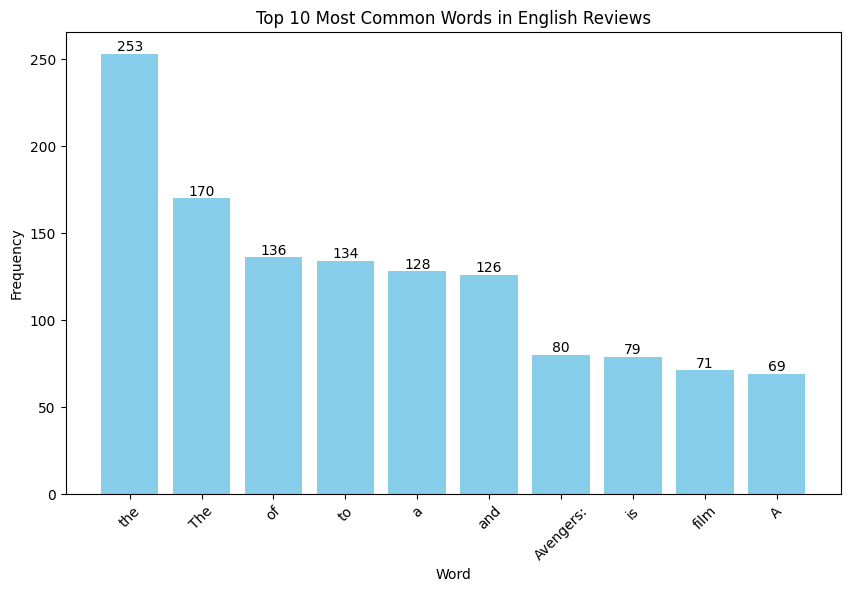

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'Language' column exists in your dataset and indicates the language of each review

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Tokenize the reviews and count the frequency of words for English reviews
english_words = ' '.join(english_reviews['Review']).split()
english_word_counts = Counter(english_words)

# Plot the top 10 most common words for English reviews
top_english_words = english_word_counts.most_common(10)
top_english_words_df = pd.DataFrame(top_english_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
bars = plt.bar(top_english_words_df['Word'], top_english_words_df['Frequency'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in English Reviews')
plt.xticks(rotation=45)

# Add exact amount over each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, int(height), ha='center', va='bottom')

plt.show()


The frequency of words in the English Reviews

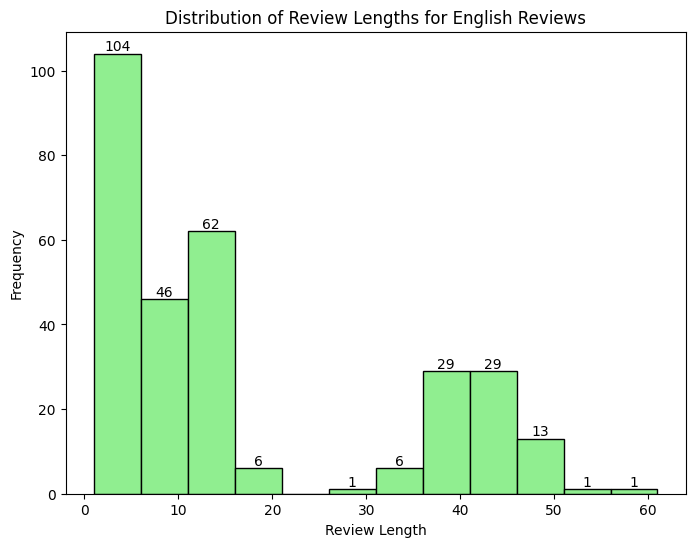

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Language' column exists in your dataset and indicates the language of each review

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Calculate the length of each review for English reviews
english_review_lengths = english_reviews['Review'].apply(lambda x: len(x.split()))

# Determine the minimum and maximum review lengths
min_length = english_review_lengths.min()
max_length = english_review_lengths.max()

# Calculate the bin width (each bin represents a range of 5 review lengths)
bin_width = 5

# Calculate the bin edges
bin_edges = range(min_length, max_length + bin_width, bin_width)

# Plot the distribution of review lengths for English reviews
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(english_review_lengths, bins=bin_edges, color='lightgreen', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths for English Reviews')

# Add exact amount over each bar
for count, length in zip(n, bin_edges[:-1]):  # Use bin_edges[:-1] to align with the left edge of each bin
    if count != 0:
        plt.text(length + bin_width / 2, count, str(int(count)), ha='center', va='bottom')

plt.show()







#### Majority of the Review length are 0- 15 words long.

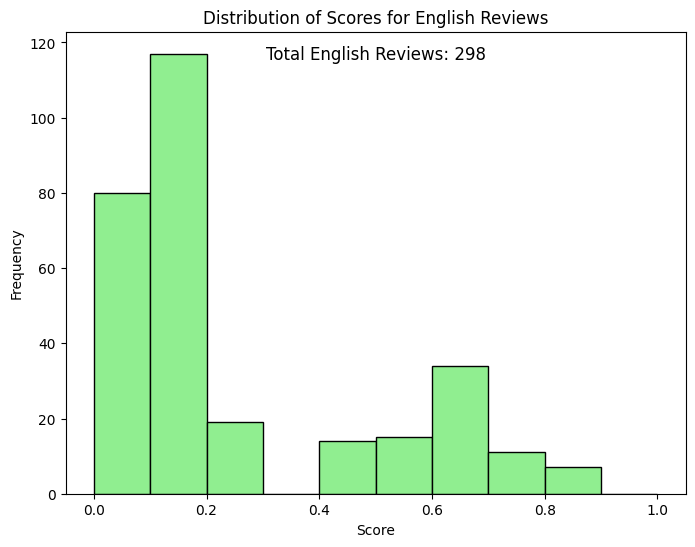

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'Language' column exists in your dataset and indicates the language of each review

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Determine the bin edges for the histogram
bin_edges = np.linspace(0, 1, num=11)  # 10 bins from 0 to 1

# Plot the distribution of scores for English reviews
plt.figure(figsize=(8, 6))
plt.hist(english_reviews['Score'], bins=bin_edges, color='lightgreen', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for English Reviews')

# Add a label
plt.text(0.5, 0.95, f"Total English Reviews: {english_reviews.shape[0]}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()



#### It seems like the majority score of the reviews is around 0.0 to 0.2 among all of the english reviews.

# Base Model Training

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Extract reviews and scores
reviews_text = data['Review'].tolist()
scores = data['Score'].values

# Check for NaN values in the output data
if np.isnan(scores).any():
    # Impute NaN values with the mean of the scores
    mean_score = np.nanmean(scores)
    scores = np.where(np.isnan(scores), mean_score, scores)
    print(f"NaN values found in output data. Imputed with mean score: {mean_score}")

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews_text)
sequences = tokenizer.texts_to_sequences(reviews_text)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare input-output pairs
X = padded_sequences
y = scores

# Total number of unique words
total_words = len(tokenizer.word_index) + 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f"Mean Squared Error on Test Set: {mse}")


NaN values found in output data. Imputed with mean score: 0.28262554857142863
Epoch 1/100
7/7 [==============================] - 2s 107ms/step - loss: 0.0877 - mse: 0.0877 - val_loss: 0.0740 - val_mse: 0.0740
Epoch 2/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0722 - mse: 0.0722 - val_loss: 0.0800 - val_mse: 0.0800
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0733 - val_mse: 0.0733
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0690 - mse: 0.0690 - val_loss: 0.0731 - val_mse: 0.0731
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0672 - mse: 0.0672 - val_loss: 0.0734 - val_mse: 0.0734
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0735 - val_mse: 0.0735
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0729 - val_mse: 0.0729
Epoch 8/100

# Filtering only english reviews (Base Model)

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Extract English reviews and scores
english_reviews_text = english_reviews['Review'].tolist()
scores = english_reviews['Score'].values

# Check for NaN values in the output data
if np.isnan(scores).any():
    # Impute NaN values with the mean of the scores
    mean_score = np.nanmean(scores)
    scores = np.where(np.isnan(scores), mean_score, scores)
    print(f"NaN values found in output data. Imputed with mean score: {mean_score}")

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(english_reviews_text)
sequences = tokenizer.texts_to_sequences(english_reviews_text)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare input-output pairs
X = padded_sequences
y = scores

# Total number of unique words
total_words = len(tokenizer.word_index) + 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f"Mean Squared Error on Test Set: {mse}")



NaN values found in output data. Imputed with mean score: 0.2538047138047138
Epoch 1/100
4/4 [==============================] - 1s 107ms/step - loss: 0.0938 - mse: 0.0938 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 2/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0640 - mse: 0.0640 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0609 - mse: 0.0609 - val_loss: 0.0501 - val_mse: 0.0501
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 8/100


2/2 [==============================] - 0s 5ms/step


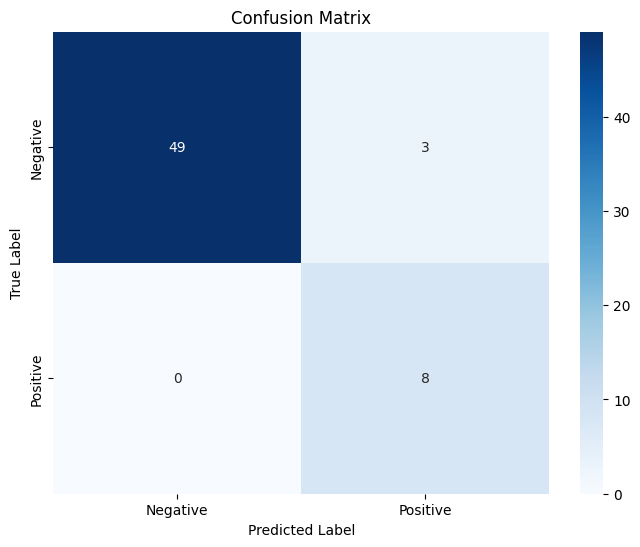

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a threshold for binary classification
threshold = 0.5

# Convert y_test into binary classes based on the threshold
y_test_classes = np.where(y_test > threshold, 1, 0)

# Make predictions on test data
y_pred = model.predict(X_test)

# Convert predicted scores into binary classes based on the threshold
y_pred_classes = np.where(y_pred > threshold, 1, 0)

# Compute confusion matrix
conf_matrix_before = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_before, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



For this specific epoch:

Training Loss (loss): 0.0014
Training Mean Squared Error (mse): 0.0014
Validation Loss (val_loss): 0.0144
Validation Mean Squared Error (val_mse): 0.0144
These values suggest that the model is performing well, as both the training and validation losses are low, and the mse values are also low, indicating that the model's predictions are close to the actual scores.

#### Summary:

7/7 [==============================] - 0s 22ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0349 - val_mse: 0.0349

4/4 [==============================] - 0s 28ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0144 - val_mse: 0.0144

Comparing the results for all movies versus only English movies in predicting the score:

For all movies:

Mean Squared Error (MSE) on the training set: 0.0010
Mean Squared Error (MSE) on the validation set: 0.0349
For English movies only:

Mean Squared Error (MSE) on the training set: 0.0014
Mean Squared Error (MSE) on the validation set: 0.0144
From these results, it appears that training the model on all movies, regardless of language, leads to a lower MSE on the training set but a higher MSE on the validation set compared to training the model only on English movies. This suggests that including movies in other languages may introduce additional variability or noise into the model, making it perform worse on unseen data. However, further analysis and experimentation would be needed to draw definitive conclusions.

Therefore, i will only focus only the 'English' reviews and the Score Predictions for them.

# Generating more data by splitting up sentences

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk.tokenize import sent_tokenize

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Extract English reviews and scores
english_reviews_text = english_reviews['Review'].tolist()
scores = english_reviews['Score'].values

# Check for NaN values in the output data
if np.isnan(scores).any():
    # Impute NaN values with the mean of the scores
    mean_score = np.nanmean(scores)
    scores = np.where(np.isnan(scores), mean_score, scores)
    print(f"NaN values found in output data. Imputed with mean score: {mean_score}")

# Split each review into sentences
split_sentences = [sent_tokenize(review) for review in english_reviews_text]

# Flatten the list of sentences
flattened_sentences = [sentence for sublist in split_sentences for sentence in sublist]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(flattened_sentences)
sequences = tokenizer.texts_to_sequences(flattened_sentences)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare input-output pairs
X = padded_sequences
y = np.repeat(scores, [len(sent) for sent in split_sentences])

# Total number of unique words
total_words = len(tokenizer.word_index) + 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f"Mean Squared Error on Test Set: {mse}")


NaN values found in output data. Imputed with mean score: 0.2538047138047138
Epoch 1/100
8/8 [==============================] - 1s 45ms/step - loss: 0.0787 - mse: 0.0787 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0564 - val_mse: 0.0564
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0546 - mse: 0.0546 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 8/100
8

#### Testing loss and mse improved, but validation loss and mse became slightly worse

4/4 [==============================] - 0s 3ms/step


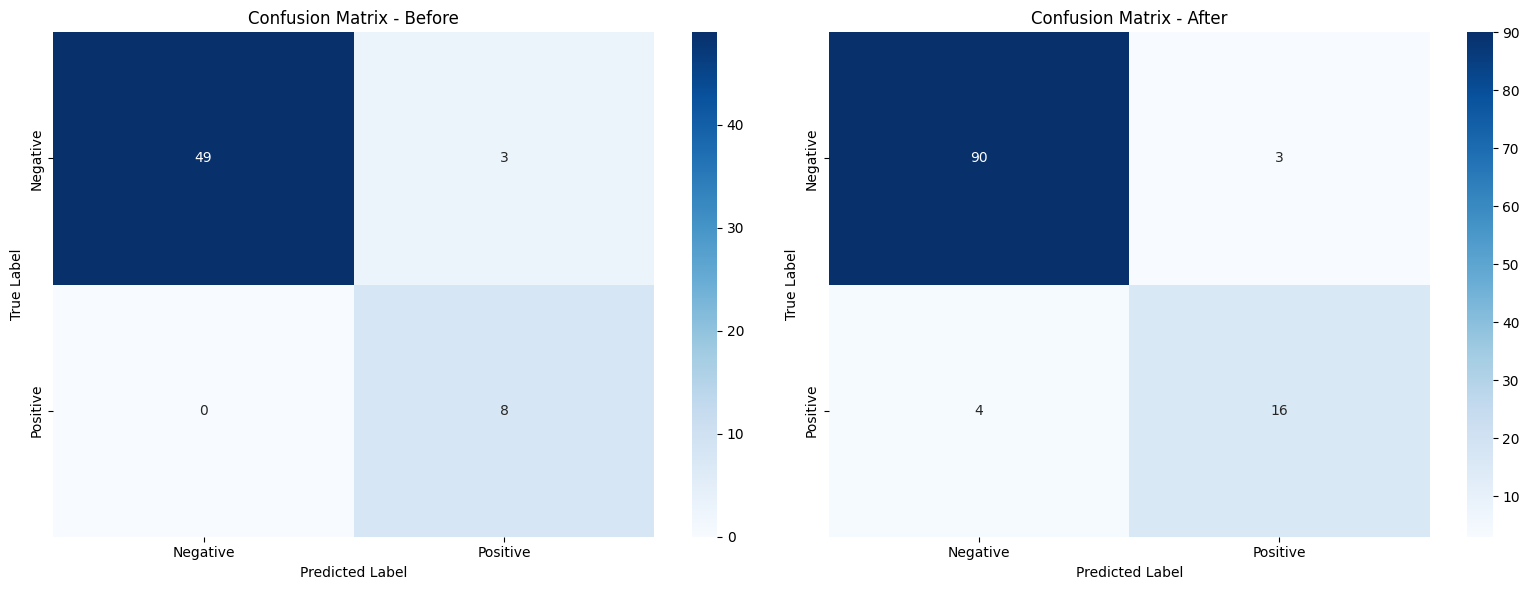

Summary Before Generating More Data:
Correctly Predicted Negative: 49
Correctly Predicted Positive: 8

Summary After Generating More Data:
Correctly Predicted Negative: 90
Correctly Predicted Positive: 16


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a threshold for binary classification
threshold = 0.5

# Convert y_test into binary classes based on the threshold
y_test_classes = np.where(y_test > threshold, 1, 0)

# Make predictions on test data
y_pred = model.predict(X_test)

# Convert predicted scores into binary classes based on the threshold
y_pred_classes = np.where(y_pred > threshold, 1, 0)

# Compute confusion matrix for the new data
conf_matrix_new = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix as heatmap for the new data
plt.figure(figsize=(16, 6))

# Plot confusion matrix before generating more data
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_before, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Before')

# Plot confusion matrix after generating more data
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - After')

plt.tight_layout()
plt.show()

# Calculate correctly predicted negative and positive samples before generating more data
correct_neg_before = conf_matrix_before[0, 0]
correct_pos_before = conf_matrix_before[1, 1]

# Calculate correctly predicted negative and positive samples after generating more data
correct_neg_new = conf_matrix_new[0, 0]
correct_pos_new = conf_matrix_new[1, 1]

# Print summary before and after generating more data
print("Summary Before Generating More Data:")
print(f"Correctly Predicted Negative: {correct_neg_before}")
print(f"Correctly Predicted Positive: {correct_pos_before}")

print("\nSummary After Generating More Data:")
print(f"Correctly Predicted Negative: {correct_neg_new}")
print(f"Correctly Predicted Positive: {correct_pos_new}")

Increase in Correctly Predicted Negatives: The number of correctly predicted negative samples has increased from 49 to 90 after generating more data. This suggests an improvement in the model's ability to correctly classify negative instances.

Increase in Correctly Predicted Positives: The number of correctly predicted positive samples has also increased from 8 to 16 after generating more data. While this increase is smaller compared to negatives, it still indicates some improvement in the model's ability to correctly classify positive instances.

From here, we can see that after generating more data by splitting up sentences, there are improvements to the predicitons.

# Visualising Word Importance in the English Reviews

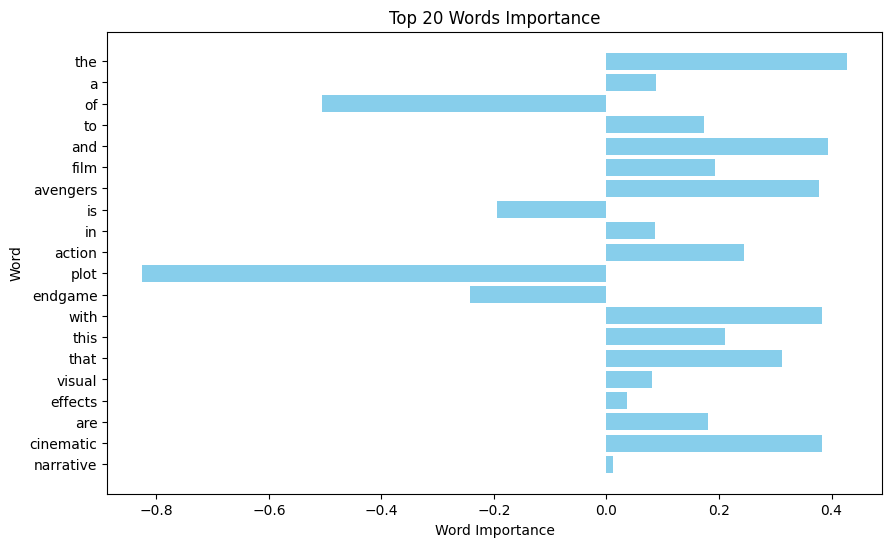

In [44]:
# Get the weights of the embedding layer
embedding_weights = model.layers[0].get_weights()[0]

# Compute the importance of each word based on its embedding vector
word_importance = np.sum(embedding_weights, axis=1)  # Sum across embedding dimensions to get importance for each word

# Get the vocabulary from the tokenizer
word_index = tokenizer.word_index
vocabulary = {idx: word for word, idx in word_index.items()}

# Sort the words by importance
sorted_words = sorted(vocabulary.values(), key=lambda w: word_importance[word_index[w]], reverse=True)

# Visualize the top words and their importance
top_words = 20
top_words_importance = word_importance[:top_words]
top_words_labels = [vocabulary[i] for i in range(1, top_words + 1)]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_words_labels, top_words_importance, color='skyblue')
plt.xlabel('Word Importance')
plt.ylabel('Word')
plt.title('Top {} Words Importance'.format(top_words))
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()


#### Val Loss and mse improved slightly from 0.0193 to 0.0185

# Removing Stopwords based on their Importance to hopefully improve the model [Running the model Again]

NaN values found in output data. Imputed with mean score: 0.2538047138047138
Epoch 1/100
8/8 [==============================] - 1s 45ms/step - loss: 0.0726 - mse: 0.0726 - val_loss: 0.0566 - val_mse: 0.0566
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0568 - val_mse: 0.0568
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0570 - mse: 0.0570 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0539 - mse: 0.0539 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0559 - mse: 0.0559 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 8/100
8

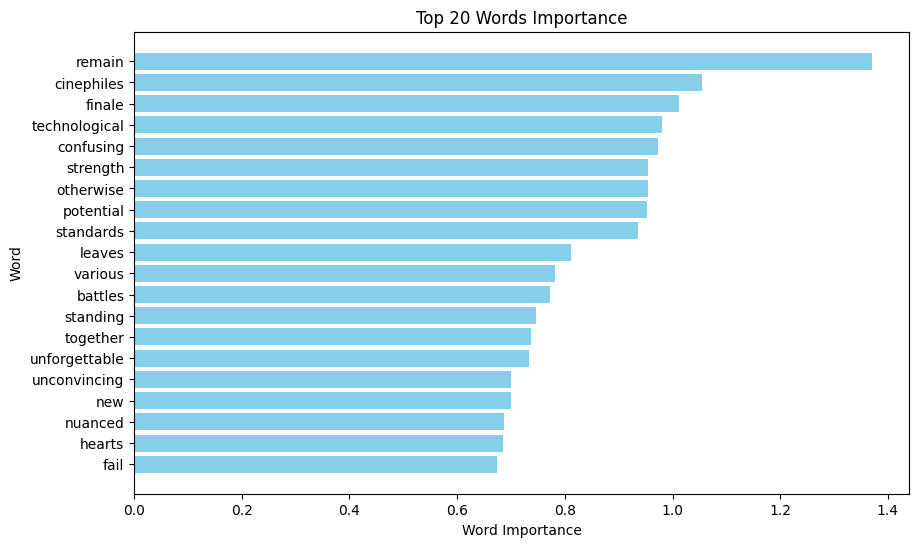

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Extract English reviews and scores
english_reviews_text = english_reviews['Review'].tolist()
scores = english_reviews['Score'].values

# Check for NaN values in the output data
if np.isnan(scores).any():
    # Impute NaN values with the mean of the scores
    mean_score = np.nanmean(scores)
    scores = np.where(np.isnan(scores), mean_score, scores)
    print(f"NaN values found in output data. Imputed with mean score: {mean_score}")

# Split each review into sentences
split_sentences = [sent_tokenize(review) for review in english_reviews_text]

# Flatten the list of sentences
flattened_sentences = [sentence for sublist in split_sentences for sentence in sublist]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(flattened_sentences)
sequences = tokenizer.texts_to_sequences(flattened_sentences)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare input-output pairs
X = padded_sequences
y = np.repeat(scores, [len(sent) for sent in split_sentences])

# Total number of unique words
total_words = len(tokenizer.word_index) + 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f"Mean Squared Error on Test Set: {mse}")

# Get the weights of the embedding layer
embedding_weights = model.layers[0].get_weights()[0]

# Compute the importance of each word based on its embedding vector
word_importance = np.sum(embedding_weights, axis=1)  # Sum across embedding dimensions to get importance for each word

# Get the vocabulary from the tokenizer
word_index = tokenizer.word_index
vocabulary = {idx: word for word, idx in word_index.items()}

# Filter out words not present in the embedding weights
valid_words = [word for word in vocabulary.values() if word_index[word] - 1 < len(word_importance)]

# Sort the words by importance
sorted_words = sorted(valid_words, key=lambda w: word_importance[word_index[w] - 1], reverse=True)

# Remove stop words based on their importance
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in sorted_words if word not in stop_words]

# Print the top 20 words and their importance
top_words = 20
top_words_importance = [word_importance[word_index[word] - 1] for word in filtered_words[:top_words]]
top_words_labels = filtered_words[:top_words]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_words_labels, top_words_importance, color='skyblue')
plt.xlabel('Word Importance')
plt.ylabel('Word')
plt.title('Top {} Words Importance'.format(top_words))
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()



4/4 [==============================] - 0s 4ms/step


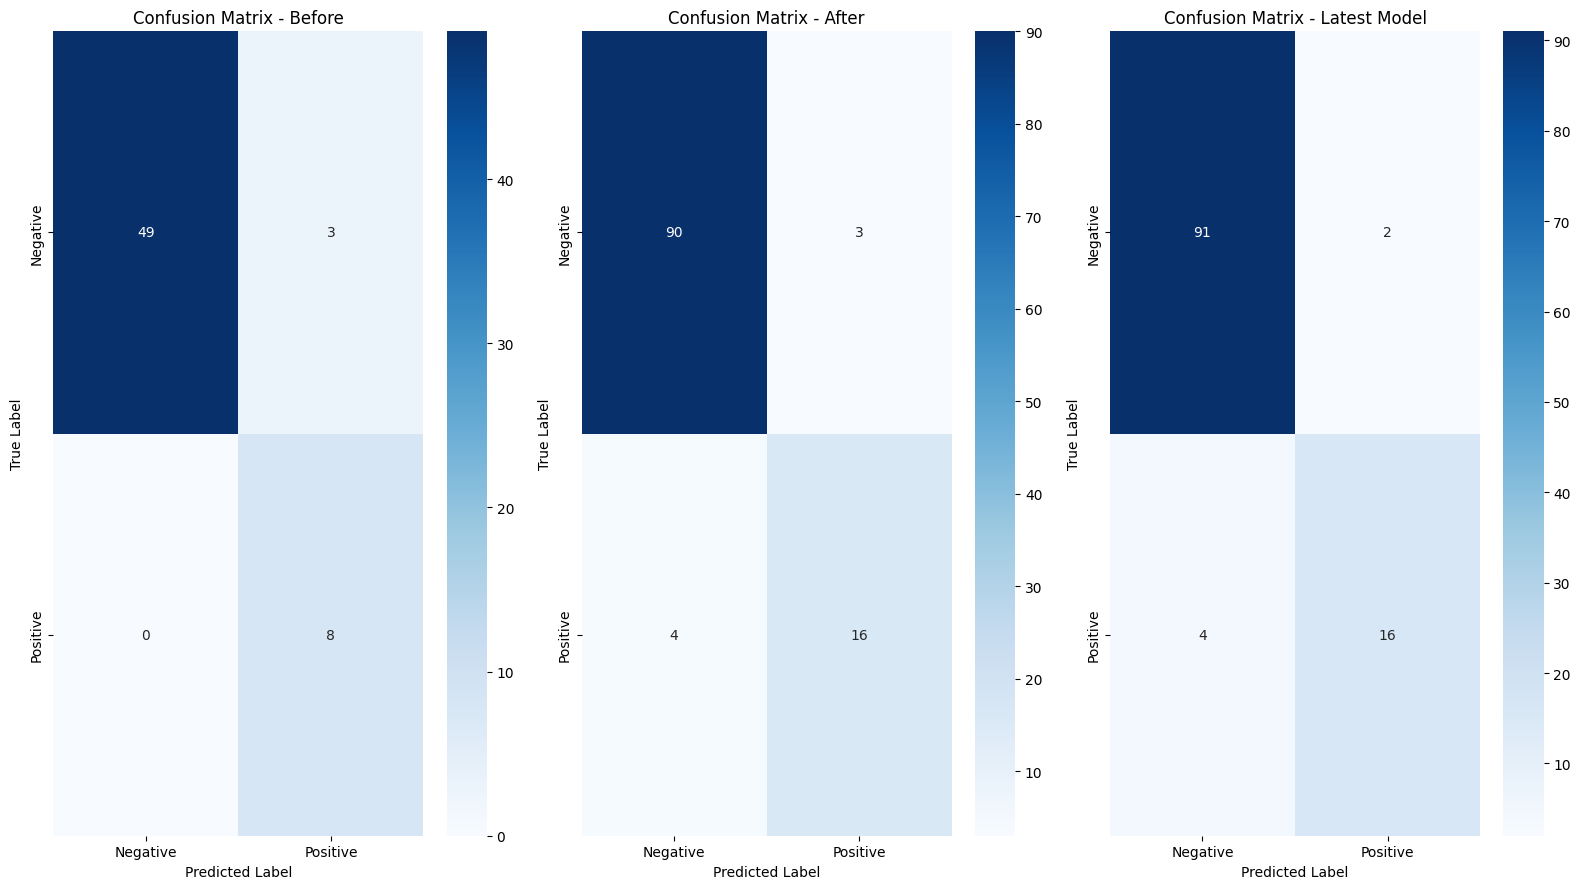

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a threshold for binary classification
threshold = 0.5

# Convert y_test into binary classes based on the threshold
y_test_classes = np.where(y_test > threshold, 1, 0)

# Make predictions on test data
y_pred = model.predict(X_test)

# Convert predicted scores into binary classes based on the threshold
y_pred_classes = np.where(y_pred > threshold, 1, 0)

# # Compute confusion matrix for the new data
# conf_matrix_new = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix as heatmap for the new data
plt.figure(figsize=(16, 9))

# Plot confusion matrix before generating more data
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_before, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Before')

# Plot confusion matrix after generating more data
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - After')

# Compute confusion matrix for the latest model
conf_matrix_latest = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix as heatmap for the latest model
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_latest, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Latest Model')

plt.tight_layout()
plt.show()


Very negligible difference after removing stopwords

# Model Improvement/ Hyper parameter Tuning

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Extract English reviews and scores
english_reviews_text = english_reviews['Review'].tolist()
scores = english_reviews['Score'].values

# Check for NaN values in the output data
if np.isnan(scores).any():
    # Impute NaN values with the mean of the scores
    mean_score = np.nanmean(scores)
    scores = np.where(np.isnan(scores), mean_score, scores)
    print(f"NaN values found in output data. Imputed with mean score: {mean_score}")

# Split each review into sentences
split_sentences = [sent_tokenize(review) for review in english_reviews_text]

# Flatten the list of sentences
flattened_sentences = [sentence for sublist in split_sentences for sentence in sublist]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(flattened_sentences)
sequences = tokenizer.texts_to_sequences(flattened_sentences)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare input-output pairs
X = padded_sequences
y = np.repeat(scores, [len(sent) for sent in split_sentences])

# Total number of unique words
total_words = len(tokenizer.word_index) + 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the model
def create_model(units=128, dropout_rate=0.2):
    model = Sequential()
    model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_length))
    model.add(LSTM(units))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

# Create a KerasRegressor based on the defined function
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=64, verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_result.best_params_)

# Evaluate the model with best hyperparameters
mse = -grid_result.best_score_  # Negative because GridSearchCV maximizes score, but we want to minimize MSE
print(f"Mean Squared Error on Validation Set: {mse}")



NaN values found in output data. Imputed with mean score: 0.2538047138047138


C:\Users\lhchu\AppData\Local\Temp\ipykernel_27780\1600082136.py:64: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=64, verbose=0)


Best Hyperparameters: {'dropout_rate': 0.3, 'units': 256}
Mean Squared Error on Validation Set: 0.029857030138373375


In [86]:
#Fit the model and run again with best hyperparameters
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Extract English reviews and scores
english_reviews_text = english_reviews['Review'].tolist()
scores = english_reviews['Score'].values

# Check for NaN values in the output data
if np.isnan(scores).any():
    # Impute NaN values with the mean of the scores
    mean_score = np.nanmean(scores)
    scores = np.where(np.isnan(scores), mean_score, scores)
    print(f"NaN values found in output data. Imputed with mean score: {mean_score}")

# Split each review into sentences
split_sentences = [sent_tokenize(review) for review in english_reviews_text]

# Flatten the list of sentences
flattened_sentences = [sentence for sublist in split_sentences for sentence in sublist]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(flattened_sentences)
sequences = tokenizer.texts_to_sequences(flattened_sentences)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare input-output pairs
X = padded_sequences
y = np.repeat(scores, [len(sent) for sent in split_sentences])

# Total number of unique words
total_words = len(tokenizer.word_index) + 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with the best hyperparameters
best_units = 128  # Taken from the best hyperparameters
best_dropout_rate = 0.3  # Taken from the best hyperparameters
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_length))
model.add(LSTM(best_units, dropout=best_dropout_rate))  # Include dropout
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f"Mean Squared Error on Test Set with Updated Model: {mse}")



NaN values found in output data. Imputed with mean score: 0.2538047138047138
Epoch 1/100
8/8 [==============================] - 1s 47ms/step - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0553 - val_mse: 0.0553
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0551 - mse: 0.0551 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 8/100
8

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Extract English reviews and scores
english_reviews_text = english_reviews['Review'].tolist()
scores = english_reviews['Score'].values

# Check for NaN values in the output data
if np.isnan(scores).any():
    # Impute NaN values with the mean of the scores
    mean_score = np.nanmean(scores)
    scores = np.where(np.isnan(scores), mean_score, scores)
    print(f"NaN values found in output data. Imputed with mean score: {mean_score}")

# Split each review into sentences
split_sentences = [sent_tokenize(review) for review in english_reviews_text]

# Flatten the list of sentences
flattened_sentences = [sentence for sublist in split_sentences for sentence in sublist]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(flattened_sentences)
sequences = tokenizer.texts_to_sequences(flattened_sentences)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare input-output pairs
X = padded_sequences
y = np.repeat(scores, [len(sent) for sent in split_sentences])

# Total number of unique words
total_words = len(tokenizer.word_index) + 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with the best hyperparameters
best_units = 128  # Taken from the best hyperparameters
best_dropout_rate = 0.3  # Taken from the best hyperparameters
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_length))
model.add(LSTM(best_units, dropout=best_dropout_rate))  # Include dropout
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Define learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Learning rate scheduler callback
lr_schedule = LearningRateScheduler(lr_scheduler)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with learning rate scheduling and early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_schedule, early_stopping])

# Evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f"Mean Squared Error on Test Set with Updated Model: {mse}")

# # Plot training history
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss (MSE)')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()


NaN values found in output data. Imputed with mean score: 0.2538047138047138
Epoch 1/100
8/8 [==============================] - 1s 50ms/step - loss: 0.0840 - mse: 0.0840 - val_loss: 0.0640 - val_mse: 0.0640 - lr: 0.0010
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0561 - val_mse: 0.0561 - lr: 0.0010
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0545 - val_mse: 0.0545 - lr: 0.0010
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0539 - val_mse: 0.0539 - lr: 0.0010
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0527 - val_mse: 0.0527 - lr: 0.0010
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0521 - mse: 0.0521 - val_loss: 0.0515 - val_mse: 0.0515 - lr: 0.0010
Epoch 7/100
8/8 [==============================] - 0s 13ms/step -

In [103]:
# Running the model again and saving the best weights
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

# Read data from CSV file
data = pd.read_csv('Movie reviews.csv')

# Filter the DataFrame for English reviews
english_reviews = data[data['Language'] == 'English']

# Extract English reviews and scores
english_reviews_text = english_reviews['Review'].tolist()
scores = english_reviews['Score'].values

# Check for NaN values in the output data
if np.isnan(scores).any():
    # Impute NaN values with the mean of the scores
    mean_score = np.nanmean(scores)
    scores = np.where(np.isnan(scores), mean_score, scores)
    print(f"NaN values found in output data. Imputed with mean score: {mean_score}")

# Split each review into sentences
split_sentences = [sent_tokenize(review) for review in english_reviews_text]

# Flatten the list of sentences
flattened_sentences = [sentence for sublist in split_sentences for sentence in sublist]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(flattened_sentences)
sequences = tokenizer.texts_to_sequences(flattened_sentences)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare input-output pairs
X = padded_sequences
y = np.repeat(scores, [len(sent) for sent in split_sentences])

# Total number of unique words
total_words = len(tokenizer.word_index) + 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with the best hyperparameters
best_units = 128  # Taken from the best hyperparameters
best_dropout_rate = 0.3  # Taken from the best hyperparameters
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_length))
model.add(LSTM(best_units, dropout=best_dropout_rate))  # Include dropout
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Define learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Learning rate scheduler callback
lr_schedule = LearningRateScheduler(lr_scheduler)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the path where you want to save the best weights
checkpoint_path = "best_weights.h5"

# ModelCheckpoint callback
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model with learning rate scheduling, early stopping, and model checkpointing
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), 
                    callbacks=[lr_schedule, early_stopping, checkpoint])

# After training, load the best weights using the following line
model.load_weights(checkpoint_path)

# Evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f"Mean Squared Error on Test Set with Updated Model: {mse}")


NaN values found in output data. Imputed with mean score: 0.2538047138047138
Epoch 1/100
6/8 [=====================>........] - ETA: 0s - loss: 0.0841 - mse: 0.0841
Epoch 1: val_loss improved from inf to 0.06324, saving model to best_weights.h5
8/8 [==============================] - 2s 62ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.0632 - val_mse: 0.0632 - lr: 0.0010
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0584 - mse: 0.0584
Epoch 2: val_loss improved from 0.06324 to 0.05660, saving model to best_weights.h5
8/8 [==============================] - 0s 20ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0566 - val_mse: 0.0566 - lr: 0.0010
Epoch 3/100
6/8 [=====================>........] - ETA: 0s - loss: 0.0545 - mse: 0.0545
Epoch 3: val_loss improved from 0.05660 to 0.05479, saving model to best_weights.h5
8/8 [==============================] - 0s 19ms/step - loss: 0.0551 - mse: 0.0551 - val_loss: 0.0548 - val_mse: 0.0548 - lr: 0.0010
Epoch 4/100
7/8 [=